# Análisis de Datos (Marketing)
### Objetivo: Dirigir acciones de marketing explotando diferencias en popularidad de productos.

## 1.1. Importación y limpieza de datos:
- Importar datos de daily_calendar_with_events.csv, item_prices.csv, y item_sales.csv.
- Limpiar y preparar los datos para análisis.
### Checklist:
- Importar datos
- Limpiar datos (tratar valores nulos, duplicados)
- Preparar datos para análisis

In [ ]:
raw_data_path = "../_data/_raw/"

clean_data_path = "../_data/"

In [ ]:
import pandas as pd

# Cargar los archivos CSV
calendar_df = pd.read_csv(raw_data_path+'daily_calendar_with_events.csv')
prices_df = pd.read_csv(raw_data_path+'item_prices.csv')
sales_df = pd.read_csv(raw_data_path+'item_sales.csv')

# Mostrar las primeras filas de cada dataframe
print("Daily Calendar with Events - Primeras filas")
print(calendar_df.head())
print("\nItem Prices - Primeras filas")
print(prices_df.head())
print("\nItem Sales - Primeras filas")
print(sales_df.head())

# Mostrar los valores únicos de las columnas más importantes
print("\nValores únicos de las columnas más importantes")
print("\nDaily Calendar with Events")
print(calendar_df.nunique())
print("\nItem Prices")
print(prices_df.nunique())
print("\nItem Sales")
print(sales_df.nunique())


Daily Calendar with Events - Primeras filas
         date    weekday  weekday_int    d event
0  2011-01-29   Saturday            1  d_1   NaN
1  2011-01-30     Sunday            2  d_2   NaN
2  2011-01-31     Monday            3  d_3   NaN
3  2011-02-01    Tuesday            4  d_4   NaN
4  2011-02-02  Wednesday            5  d_5   NaN

Item Prices - Primeras filas
               item    category store_code  yearweek  sell_price
0  ACCESORIES_1_001  ACCESORIES      NYC_1  201328.0     12.7414
1  ACCESORIES_1_001  ACCESORIES      NYC_1  201329.0     12.7414
2  ACCESORIES_1_001  ACCESORIES      NYC_1  201330.0     10.9858
3  ACCESORIES_1_001  ACCESORIES      NYC_1  201331.0     10.9858
4  ACCESORIES_1_001  ACCESORIES      NYC_1  201332.0     10.9858

Item Sales - Primeras filas
                       id              item    category    department  \
0  ACCESORIES_1_001_NYC_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
1  ACCESORIES_1_002_NYC_1  ACCESORIES_1_002  ACCESORIES  ACCESORIES

Daily Calendar with Events - Primeras filas
         date    weekday  weekday_int    d event
0  2011-01-29   Saturday            1  d_1   NaN
1  2011-01-30     Sunday            2  d_2   NaN
2  2011-01-31     Monday            3  d_3   NaN
3  2011-02-01    Tuesday            4  d_4   NaN
4  2011-02-02  Wednesday            5  d_5   NaN

Item Prices - Primeras filas
               item    category store_code  yearweek  sell_price
0  ACCESORIES_1_001  ACCESORIES      NYC_1  201328.0     12.7414
1  ACCESORIES_1_001  ACCESORIES      NYC_1  201329.0     12.7414
2  ACCESORIES_1_001  ACCESORIES      NYC_1  201330.0     10.9858
3  ACCESORIES_1_001  ACCESORIES      NYC_1  201331.0     10.9858
4  ACCESORIES_1_001  ACCESORIES      NYC_1  201332.0     10.9858

Item Sales - Primeras filas
                       id              item    category    department  \
0  ACCESORIES_1_001_NYC_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
1  ACCESORIES_1_002_NYC_1  ACCESORIES_1_002  ACCESORIES  ACCESORIES

In [7]:
calendar_df.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


In [8]:
prices_df.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [9]:
sales_df.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [10]:
# Descripción estadística básica de las columnas de ventas diarias
ventas_columnas = [col for col in sales_df.columns if col.startswith('d_')]
sales_df[ventas_columnas].describe()


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,...,1.370581,1.586159,1.693670,1.248245,1.232207,1.159167,1.149000,1.328862,1.605838,1.633158
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,...,3.740017,4.097191,4.359809,3.276925,3.125471,2.876026,2.950364,3.358012,4.089422,3.812248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.000000,316.000000,370.000000,385.000000,353.000000,...,129.000000,160.000000,204.000000,98.000000,100.000000,88.000000,77.000000,141.000000,171.000000,130.000000


In [12]:
# Ventas totales por artículo
ventas_totales_articulo = sales_df.set_index('item')[ventas_columnas].sum(axis=1).reset_index()
ventas_totales_articulo.columns = ['item', 'total_sales']
print("Ventas totales por artículo:")
print(ventas_totales_articulo.head(20))

# Ventas totales por tienda
ventas_totales_tienda = sales_df.groupby('store')[ventas_columnas].sum().sum(axis=1).reset_index()
ventas_totales_tienda.columns = ['store', 'total_sales']
print("\nVentas totales por tienda:")
print(ventas_totales_tienda.head(20))

# Ventas totales por categoría
ventas_totales_categoria = sales_df.groupby('category')[ventas_columnas].sum().sum(axis=1).reset_index()
ventas_totales_categoria.columns = ['category', 'total_sales']
print("\nVentas totales por categoría:")
print(ventas_totales_categoria.head(20))


Ventas totales por artículo:
                item  total_sales
0   ACCESORIES_1_001          600
1   ACCESORIES_1_002          493
2   ACCESORIES_1_003          288
3   ACCESORIES_1_004         3288
4   ACCESORIES_1_005         1849
5   ACCESORIES_1_006         1642
6   ACCESORIES_1_007          424
7   ACCESORIES_1_008        13830
8   ACCESORIES_1_009         2269
9   ACCESORIES_1_010         1376
10  ACCESORIES_1_011          142
11  ACCESORIES_1_012          754
12  ACCESORIES_1_013          493
13  ACCESORIES_1_014         2398
14  ACCESORIES_1_015        11602
15  ACCESORIES_1_016        10575
16  ACCESORIES_1_017         2009
17  ACCESORIES_1_018           88
18  ACCESORIES_1_019         9052
19  ACCESORIES_1_020          615

Ventas totales por tienda:
               store  total_sales
0           Back_Bay      6089330
1           Brooklyn      4103676
2  Greenwich_Village      7698216
3             Harlem      5685475
4    Midtown_Village      5149062
5      Queen_Village     

category           ACCESORIES  HOME_&_GARDEN  SUPERMARKET
store                                                    
Back_Bay               527258        1398984      4163088
Brooklyn               564455         719796      2819425
Greenwich_Village      876678        1440710      5380828
Harlem                 637803        1567413      3480259
Midtown_Village        655696        1055014      3438352


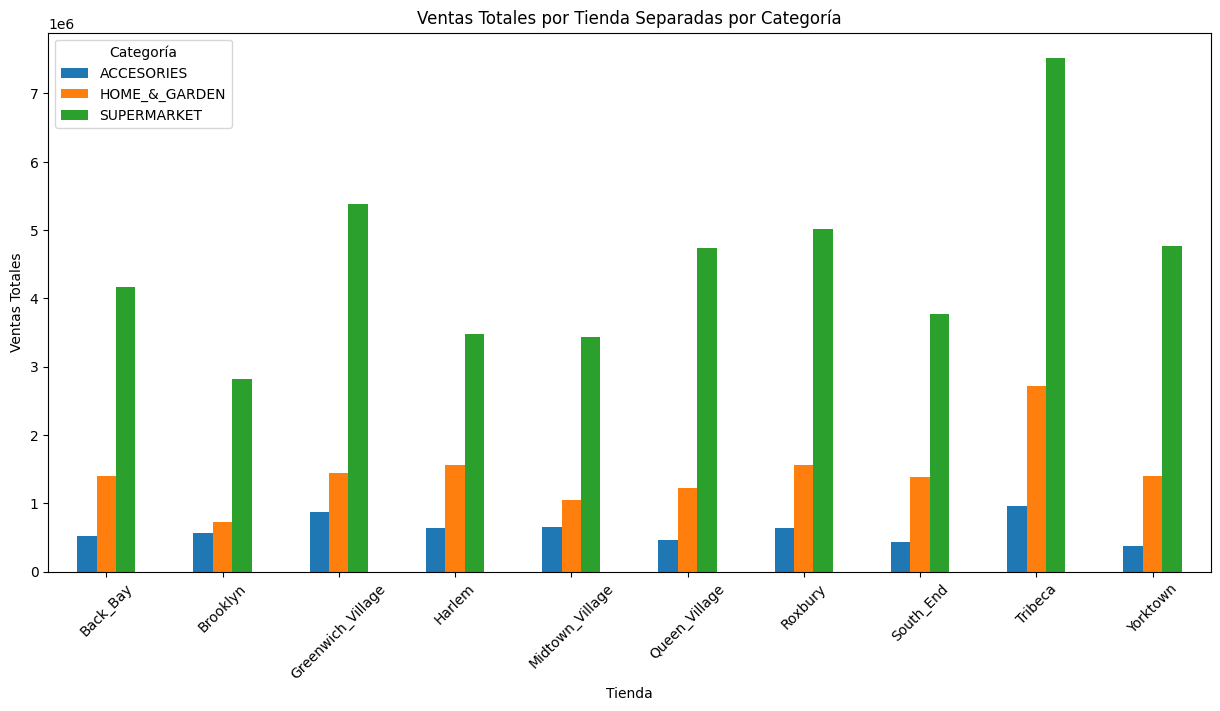

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Columnas de ventas diarias
ventas_columnas = [col for col in sales_df.columns if col.startswith('d_')]

# Agrupar ventas por tienda y categoría
ventas_por_tienda_categoria = sales_df.groupby(['store', 'category'])[ventas_columnas].sum().sum(axis=1).unstack().fillna(0)

# Verificar los datos agrupados
print(ventas_por_tienda_categoria.head())

# Graficar ventas totales por tienda separadas por categoría en barras agrupadas
ventas_por_tienda_categoria.plot(kind='bar', figsize=(15, 7))
plt.xlabel('Tienda')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Tienda Separadas por Categoría')
plt.xticks(rotation=45)
plt.legend(title='Categoría')
plt.show()


<small>

### Resumen de Resultados del Gráfico "Ventas Totales por Tienda Separadas por Categoría"

**Conclusiones:**
1. **Dominio de Supermercados:** La categoría "SUPERMARKET" tiene las ventas más altas en todas las tiendas.
2. **Tiendas Destacadas:** Tribeca y Greenwich Village lideran en ventas totales, especialmente en "SUPERMARKET".
3. **Desempeño de Categorías:** "HOME & GARDEN" y "ACCESORIES" tienen ventas significativamente menores comparadas con "SUPERMARKET".

**Acciones a Realizar:**
1. **Análisis de Ingresos (Ventas * Precio):** 
    - **Identificar Productos Rentables:** Evaluar los ingresos generados por productos en cada categoría y tienda para identificar los más rentables.
    - **Promociones Dirigidas:** Diseñar promociones específicas para productos de alta rentabilidad que puedan atraer más clientes.

2. **Optimización de Inventarios:**
    - **Gestión de Inventarios:** Priorizar la gestión de inventarios de productos en la categoría "SUPERMARKET" debido a sus altos volúmenes de ventas.
    - **Reducción de Stock Muerto:** Revisar productos en categorías de menores ventas ("HOME & GARDEN" y "ACCESORIES") para reducir inventarios no rotativos y evitar pérdidas.

3. **Estrategias de Marketing Localizado:**
    - **Campañas en Tiendas con Menores Ventas:** Implementar campañas de marketing específicas en tiendas con menores ventas en "SUPERMARKET" para aumentar la demanda.
    - **Promocionar Categorías Menos Populares:** Incrementar la visibilidad y atractivo de las categorías "HOME & GARDEN" y "ACCESORIES" mediante promociones y mejores exhibiciones.

4. **Revisión de Precios:**
    - **Ajustes de Precios:** Evaluar si los precios actuales están alineados con la demanda y la competencia, especialmente en las categorías con menores ventas.
    - **Precio vs. Demanda:** Analizar la elasticidad de precio para ajustar las estrategias de precios y maximizar ingresos sin afectar negativamente las ventas.

Implementando estas estrategias basadas en un análisis detallado de ventas y precios, se puede optimizar la rentabilidad y mejorar el desempeño de productos en todas las tiendas.

In [39]:
import pandas as pd

# Columnas de ventas diarias
ventas_columnas = [col for col in sales_df.columns if col.startswith('d_')]

# Calcular ventas totales por producto y categoría
ventas_totales_producto_categoria = sales_df.groupby(['category', 'item'])[ventas_columnas].sum().sum(axis=1).reset_index()
ventas_totales_producto_categoria.columns = ['category', 'item', 'total_sales']

# Mostrar los resultados
print(ventas_totales_producto_categoria)


         category               item  total_sales
0      ACCESORIES   ACCESORIES_1_001         4093
1      ACCESORIES   ACCESORIES_1_002         5059
2      ACCESORIES   ACCESORIES_1_003         1435
3      ACCESORIES   ACCESORIES_1_004        39175
4      ACCESORIES   ACCESORIES_1_005        14621
...           ...                ...          ...
3044  SUPERMARKET  SUPERMARKET_3_823        15388
3045  SUPERMARKET  SUPERMARKET_3_824         8325
3046  SUPERMARKET  SUPERMARKET_3_825        13526
3047  SUPERMARKET  SUPERMARKET_3_826        12188
3048  SUPERMARKET  SUPERMARKET_3_827        11377

[3049 rows x 3 columns]


C:\Users\pcamp\AppData\Local\Temp\ipykernel_11960\4240038856.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_articulos_por_categoria = ventas_totales_producto_categoria.groupby('category').apply(lambda x: x.nlargest(10, 'total_sales')).reset_index(drop=True)


         category                 item  total_sales
0      ACCESORIES     ACCESORIES_1_371       122565
1      ACCESORIES     ACCESORIES_1_348       105876
2      ACCESORIES     ACCESORIES_1_268        95171
3      ACCESORIES     ACCESORIES_1_341        92427
4      ACCESORIES     ACCESORIES_1_178        90433
5      ACCESORIES     ACCESORIES_1_370        89792
6      ACCESORIES     ACCESORIES_1_008        87645
7      ACCESORIES     ACCESORIES_1_254        87155
8      ACCESORIES     ACCESORIES_1_015        84541
9      ACCESORIES     ACCESORIES_1_256        79121
10  HOME_&_GARDEN  HOME_&_GARDEN_1_334       171275
11  HOME_&_GARDEN  HOME_&_GARDEN_1_459       170532
12  HOME_&_GARDEN  HOME_&_GARDEN_1_521       153340
13  HOME_&_GARDEN  HOME_&_GARDEN_1_303       148818
14  HOME_&_GARDEN  HOME_&_GARDEN_1_110       146719
15  HOME_&_GARDEN  HOME_&_GARDEN_1_327       129262
16  HOME_&_GARDEN  HOME_&_GARDEN_1_083       128097
17  HOME_&_GARDEN  HOME_&_GARDEN_1_019       124319
18  HOME_&_G

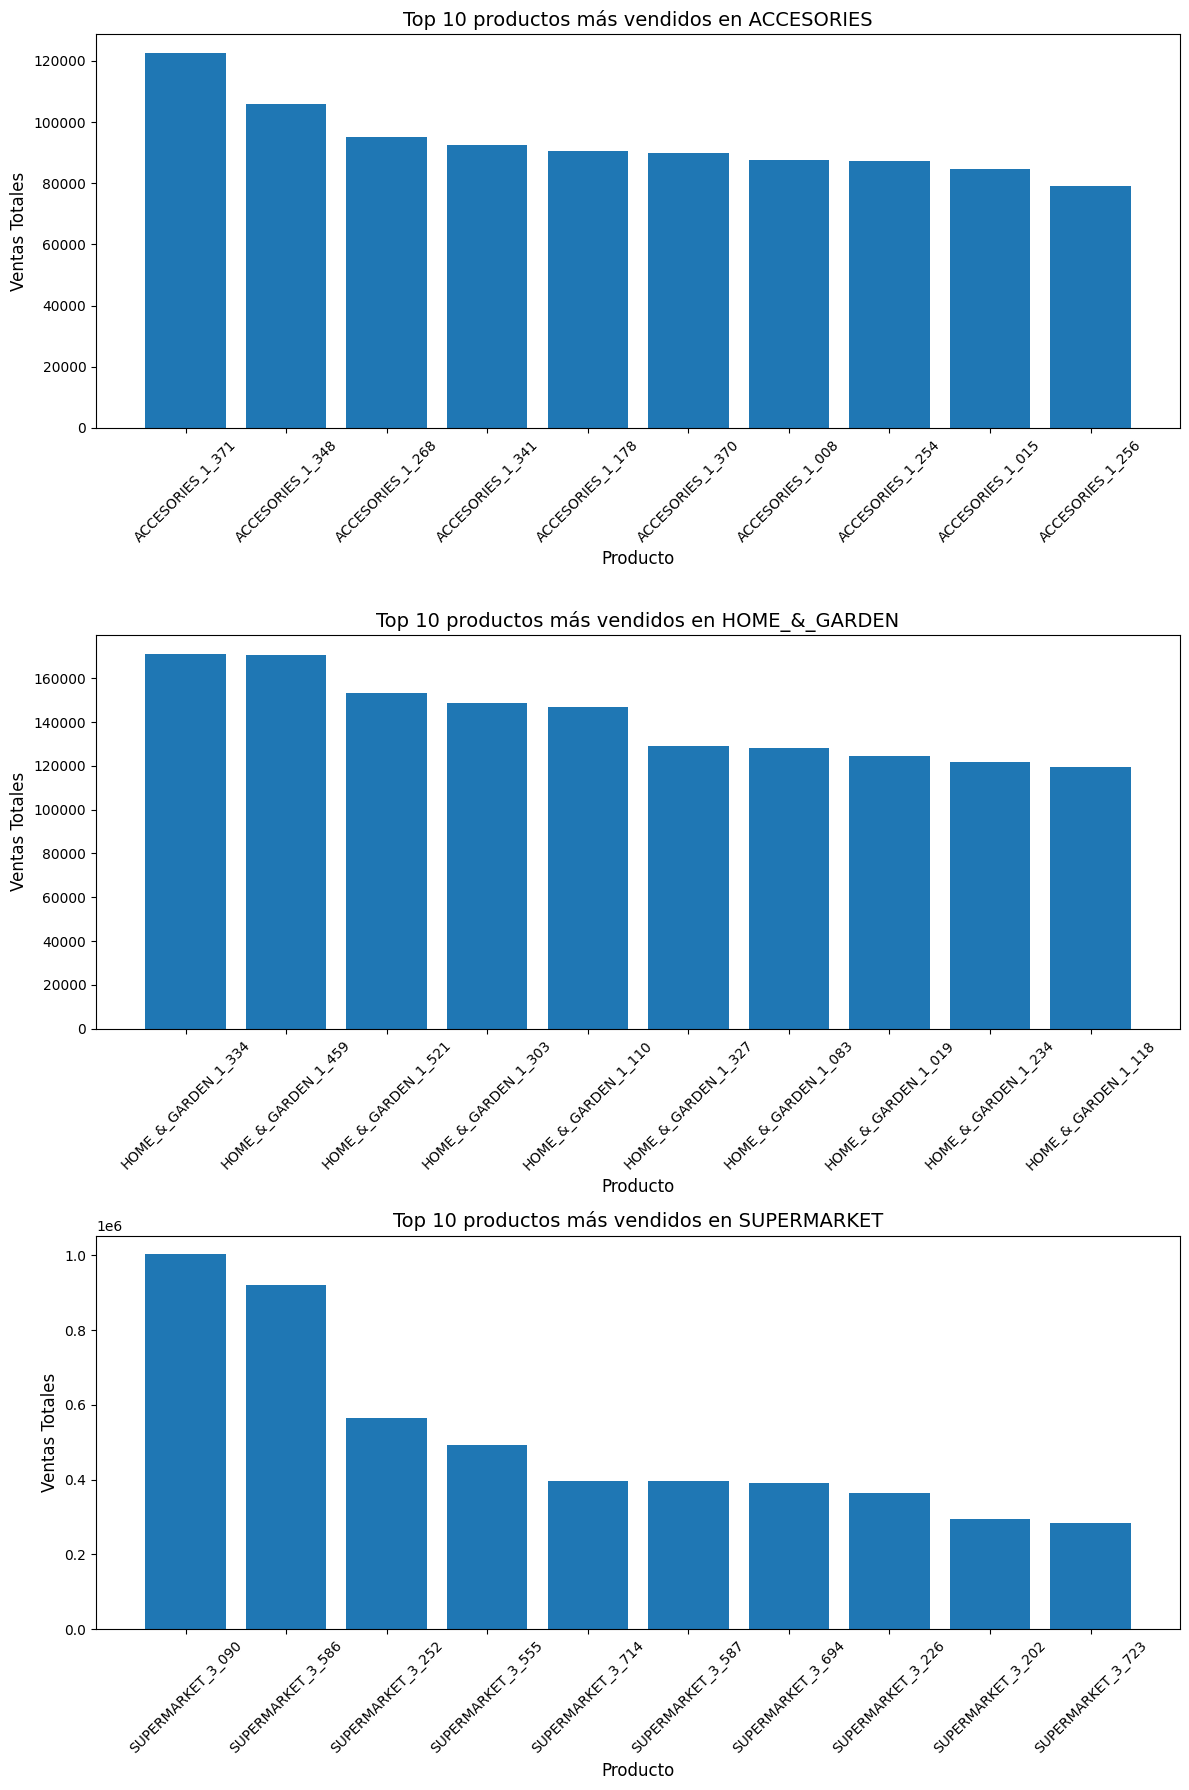

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Columnas de ventas diarias
ventas_columnas = [col for col in sales_df.columns if col.startswith('d_')]

# Calcular ventas totales por producto y categoría
ventas_totales_producto_categoria = sales_df.groupby(['category', 'item'])[ventas_columnas].sum().sum(axis=1).reset_index()
ventas_totales_producto_categoria.columns = ['category', 'item', 'total_sales']

# Obtener los 10 artículos más vendidos por categoría
top_10_articulos_por_categoria = ventas_totales_producto_categoria.groupby('category').apply(lambda x: x.nlargest(10, 'total_sales')).reset_index(drop=True)

# Mostrar los resultados
print(top_10_articulos_por_categoria)

# Graficar los 10 productos más vendidos por categoría
categorias = top_10_articulos_por_categoria['category'].unique()
num_categorias = len(categorias)

fig, axes = plt.subplots(num_categorias, 1, figsize=(12, num_categorias * 6))

for i, categoria in enumerate(categorias):
    datos_categoria = top_10_articulos_por_categoria[top_10_articulos_por_categoria['category'] == categoria]
    axes[i].bar(datos_categoria['item'], datos_categoria['total_sales'])
    axes[i].set_title(f'Top 10 productos más vendidos en {categoria}', fontsize=14)
    axes[i].set_xlabel('Producto', fontsize=12)
    axes[i].set_ylabel('Ventas Totales', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Trasponer las columnas de ventas diarias
sales_df_melted = sales_df.melt(id_vars=['id', 'item', 'category', 'department', 'store', 'store_code', 'region'], 
                                var_name='d', 
                                value_name='sales')

# Mostrar los primeros registros para verificar
print(sales_df_melted.head())


                       id              item    category    department  \
0  ACCESORIES_1_001_NYC_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
1  ACCESORIES_1_002_NYC_1  ACCESORIES_1_002  ACCESORIES  ACCESORIES_1   
2  ACCESORIES_1_003_NYC_1  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1   
3  ACCESORIES_1_004_NYC_1  ACCESORIES_1_004  ACCESORIES  ACCESORIES_1   
4  ACCESORIES_1_005_NYC_1  ACCESORIES_1_005  ACCESORIES  ACCESORIES_1   

               store store_code    region    d  sales  
0  Greenwich_Village      NYC_1  New York  d_1      0  
1  Greenwich_Village      NYC_1  New York  d_1      0  
2  Greenwich_Village      NYC_1  New York  d_1      0  
3  Greenwich_Village      NYC_1  New York  d_1      0  
4  Greenwich_Village      NYC_1  New York  d_1      0  


In [42]:
sales_df_melted.head(25)

,id,item,category,department,store,store_code,region,d,sales
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
5,ACCESORIES_1_006_NYC_1,ACCESORIES_1_006,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
6,ACCESORIES_1_007_NYC_1,ACCESORIES_1_007,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
7,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,12
8,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,2
9,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0


In [47]:
# Unir el dataframe de ventas con el calendario
sales_df_merged = pd.merge(sales_df_melted, calendar_df, on='d', how='left')

# Mostrar los primeros registros para verificar
sales_df_merged.head()



,id,item,category,department,store,store_code,region,d,sales,date_x,date_y,weekday,weekday_int,event
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,2011-01-29,Saturday,1,NaN
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,2011-01-29,Saturday,1,NaN
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,2011-01-29,Saturday,1,NaN
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,2011-01-29,Saturday,1,NaN
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,2011-01-29,Saturday,1,NaN


In [48]:
# Eliminar columnas no necesarias
sales_df_merged = sales_df_merged.drop(columns=['date_x'])

In [49]:
sales_df_merged.head()

,id,item,category,department,store,store_code,region,d,sales,date_y,weekday,weekday_int,event
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN


In [50]:
# Mostrar la forma del DataFrame antes de eliminar filas con ventas igual a cero
print("Forma antes de eliminar filas con ventas igual a cero:", sales_df_merged.shape)

# Eliminar filas con ventas igual a cero
sales_df_merged = sales_df_merged[sales_df_merged['sales'] > 0]

# Mostrar la forma del DataFrame después de eliminar filas con ventas igual a cero
print("Forma después de eliminar filas con ventas igual a cero:", sales_df_merged.shape)

Forma antes de eliminar filas con ventas igual a cero: (58327370, 13)
Forma después de eliminar filas con ventas igual a cero: (18550276, 13)


In [53]:
# Cambiar el nombre de la columna 'date_y' a 'date'
sales_df_merged.rename(columns={'date_y': 'date'}, inplace=True)

# Crear la columna de semana en el mismo formato que en prices_df
sales_df_merged['yearweek'] = pd.to_datetime(sales_df_merged['date']).dt.strftime('%Y%U')


In [54]:
sales_df_merged.head()

,id,item,category,department,store,store_code,region,d,sales,date,weekday,weekday_int,event,yearweek
7,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,12,2011-01-29,Saturday,1,NaN,201104
8,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,2,2011-01-29,Saturday,1,NaN,201104
14,ACCESORIES_1_015_NYC_1,ACCESORIES_1_015,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,4,2011-01-29,Saturday,1,NaN,201104
15,ACCESORIES_1_016_NYC_1,ACCESORIES_1_016,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,5,2011-01-29,Saturday,1,NaN,201104
21,ACCESORIES_1_022_NYC_1,ACCESORIES_1_022,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,2,2011-01-29,Saturday,1,NaN,201104


In [56]:
# Convertir la columna 'yearweek' en ambos dataframes al tipo string
sales_df_merged['yearweek'] = sales_df_merged['yearweek'].astype(str)
prices_df['yearweek'] = prices_df['yearweek'].astype(str)

# Unir el dataframe de ventas con el dataframe de precios
sales_df_final = pd.merge(sales_df_merged, prices_df, on=['item', 'store_code', 'yearweek'], how='left')

# Mostrar los primeros registros para verificar
sales_df_final.head()


,id,item,category_x,department,store,store_code,region,d,sales,date,weekday,weekday_int,event,yearweek,category_y,sell_price
0,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,12,2011-01-29,Saturday,1,NaN,201104,NaN,NaN
1,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,2,2011-01-29,Saturday,1,NaN,201104,NaN,NaN
2,ACCESORIES_1_015_NYC_1,ACCESORIES_1_015,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,4,2011-01-29,Saturday,1,NaN,201104,NaN,NaN
3,ACCESORIES_1_016_NYC_1,ACCESORIES_1_016,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,5,2011-01-29,Saturday,1,NaN,201104,NaN,NaN
4,ACCESORIES_1_022_NYC_1,ACCESORIES_1_022,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,2,2011-01-29,Saturday,1,NaN,201104,NaN,NaN


In [59]:
# Exportar el dataframe final a un archivo CSV
sales_df_final.to_csv('sales_with_prices.csv', index=False)

print("El dataframe ha sido exportado a 'sales_with_prices.csv'")


El dataframe ha sido exportado a 'sales_with_prices.csv'


In [12]:
import pandas as pd

# Cargar los archivos CSV
df = pd.read_csv('sales_with_prices.csv', low_memory=False)
df_prices = pd.read_csv('item_prices.csv')

# Verificar los primeros registros para asegurarse de que se cargaron correctamente
print(df.head())
print(df_prices.head())


                       id              item  category_x    department  \
0  ACCESORIES_1_008_NYC_1  ACCESORIES_1_008  ACCESORIES  ACCESORIES_1   
1  ACCESORIES_1_009_NYC_1  ACCESORIES_1_009  ACCESORIES  ACCESORIES_1   
2  ACCESORIES_1_015_NYC_1  ACCESORIES_1_015  ACCESORIES  ACCESORIES_1   
3  ACCESORIES_1_016_NYC_1  ACCESORIES_1_016  ACCESORIES  ACCESORIES_1   
4  ACCESORIES_1_022_NYC_1  ACCESORIES_1_022  ACCESORIES  ACCESORIES_1   

               store store_code    region    d  sales        date   weekday  \
0  Greenwich_Village      NYC_1  New York  d_1     12  2011-01-29  Saturday   
1  Greenwich_Village      NYC_1  New York  d_1      2  2011-01-29  Saturday   
2  Greenwich_Village      NYC_1  New York  d_1      4  2011-01-29  Saturday   
3  Greenwich_Village      NYC_1  New York  d_1      5  2011-01-29  Saturday   
4  Greenwich_Village      NYC_1  New York  d_1      2  2011-01-29  Saturday   

   weekday_int event  yearweek  category_y  sell_price  
0            1   NaN    20110

In [14]:
# Eliminar las columnas 'category_y' y 'sell_price'
df.drop(columns=['category_y', 'sell_price'], inplace=True)

# Verificar los primeros registros después de eliminar las columnas
print("Primeras filas de df después de eliminar columnas:")
df.head()

Primeras filas de df después de eliminar columnas:


,id,item,category_x,department,store,store_code,region,d,sales,date,weekday,weekday_int,event,yearweek
0,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,12,2011-01-29,Saturday,1,NaN,201104
1,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,2,2011-01-29,Saturday,1,NaN,201104
2,ACCESORIES_1_015_NYC_1,ACCESORIES_1_015,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,4,2011-01-29,Saturday,1,NaN,201104
3,ACCESORIES_1_016_NYC_1,ACCESORIES_1_016,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,5,2011-01-29,Saturday,1,NaN,201104
4,ACCESORIES_1_022_NYC_1,ACCESORIES_1_022,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,2,2011-01-29,Saturday,1,NaN,201104


In [18]:
# Convertir yearweek a entero en df
df['yearweek'] = df['yearweek'].astype(int)

In [21]:
# Ordenar df_prices por item, store_code y yearweek
df_prices = df_prices.sort_values(by=['item', 'store_code', 'yearweek'])

# Interpolar y rellenar valores nulos
df_prices['sell_price'] = df_prices.groupby(['item', 'store_code'])['sell_price'].transform(
    lambda group: group.interpolate().ffill().bfill())

In [22]:
# Verificar los valores nulos restantes
print("Número de valores nulos en sell_price después de la interpolación:")
print(df_prices['sell_price'].isnull().sum())

Número de valores nulos en sell_price después de la interpolación:
0


In [23]:
# Verificar los primeros registros después de la interpolación
print("Primeras filas de df_prices después de ordenar e interpolar:")
print(df_prices.head(20))

Primeras filas de df_prices después de ordenar e interpolar:
                     item    category store_code  yearweek  sell_price
2758035  ACCESORIES_1_001  ACCESORIES      BOS_1  201328.0     12.7414
2758036  ACCESORIES_1_001  ACCESORIES      BOS_1  201329.0     10.9858
2758037  ACCESORIES_1_001  ACCESORIES      BOS_1  201330.0     10.9858
2758038  ACCESORIES_1_001  ACCESORIES      BOS_1  201331.0     10.9858
2758039  ACCESORIES_1_001  ACCESORIES      BOS_1  201332.0     10.9858
2758040  ACCESORIES_1_001  ACCESORIES      BOS_1  201333.0     10.9858
2758041  ACCESORIES_1_001  ACCESORIES      BOS_1  201334.0     10.9858
2758042  ACCESORIES_1_001  ACCESORIES      BOS_1  201335.0     10.9858
2758043  ACCESORIES_1_001  ACCESORIES      BOS_1  201336.0     10.9858
2758044  ACCESORIES_1_001  ACCESORIES      BOS_1  201337.0     10.9858
2758045  ACCESORIES_1_001  ACCESORIES      BOS_1  201338.0     10.9858
2758046  ACCESORIES_1_001  ACCESORIES      BOS_1  201339.0     10.9858
2758047  ACCESOR

In [27]:
# Mostrar los valores nulos en la columna 'yearweek' de df
print("Valores nulos en 'yearweek' en df:")
print(df[df['yearweek'].isnull()])

Valores nulos en 'yearweek' en df:
Empty DataFrame
Columns: [id, item, category_x, department, store, store_code, region, d, sales, date, weekday, weekday_int, event, yearweek, category_y, sell_price]
Index: []


In [28]:
# Mostrar los valores nulos en la columna 'yearweek' de df_prices
print("Valores nulos en 'yearweek' en df_prices:")
print(df_prices[df_prices['yearweek'].isnull()])

Valores nulos en 'yearweek' en df_prices:
                      item     category store_code  yearweek  sell_price
149       ACCESORIES_1_001   ACCESORIES      NYC_1       NaN     11.1454
150       ACCESORIES_1_001   ACCESORIES      NYC_1       NaN     11.1454
151       ACCESORIES_1_001   ACCESORIES      NYC_1       NaN     11.1454
152       ACCESORIES_1_001   ACCESORIES      NYC_1       NaN     11.1454
153       ACCESORIES_1_001   ACCESORIES      NYC_1       NaN     11.1454
...                    ...          ...        ...       ...         ...
6965701  SUPERMARKET_3_827  SUPERMARKET      PHI_3       NaN      1.2000
6965702  SUPERMARKET_3_827  SUPERMARKET      PHI_3       NaN      1.2000
6965703  SUPERMARKET_3_827  SUPERMARKET      PHI_3       NaN      1.2000
6965704  SUPERMARKET_3_827  SUPERMARKET      PHI_3       NaN      1.2000
6965705  SUPERMARKET_3_827  SUPERMARKET      PHI_3       NaN      1.2000

[243920 rows x 5 columns]


In [29]:
# Contar el número total de filas y el número de filas con valores nulos en 'yearweek'
total_filas = len(df_prices)
nulos_yearweek = df_prices['yearweek'].isnull().sum()

# Calcular el porcentaje de filas con valores nulos en 'yearweek'
porcentaje_nulos = (nulos_yearweek / total_filas) * 100

print(f"Número total de filas en df_prices: {total_filas}")
print(f"Número de filas con valores nulos en 'yearweek': {nulos_yearweek}")
print(f"Porcentaje de filas con valores nulos en 'yearweek': {porcentaje_nulos:.2f}%")


Número total de filas en df_prices: 6965706
Número de filas con valores nulos en 'yearweek': 243920
Porcentaje de filas con valores nulos en 'yearweek': 3.50%


In [30]:
# Eliminar filas con valores nulos en 'yearweek'
df_prices = df_prices.dropna(subset=['yearweek'])

# Convertir 'yearweek' a enteros después de eliminar los nulos
df_prices['yearweek'] = df_prices['yearweek'].astype(int)

# Verificar los valores nulos restantes en df_prices
print("Número de valores nulos en df_prices después de la eliminación:")
print(df_prices.isnull().sum())

# Unir la columna sell_price a df
df = pd.merge(df, df_prices[['item', 'store_code', 'yearweek', 'sell_price']], 
              on=['item', 'store_code', 'yearweek'], how='left')

# Verificar los primeros registros para asegurar la unión correcta
print("Primeros registros del DataFrame combinado:")
print(df.head())

# Guardar el DataFrame resultante en un nuevo CSV si es necesario
df.to_csv('sales_with_prices_final.csv', index=False)


Número de valores nulos en df_prices después de la eliminación:
item          0
category      0
store_code    0
yearweek      0
sell_price    0
dtype: int64
Primeros registros del DataFrame combinado:
                       id              item  category_x    department  \
0  ACCESORIES_1_008_NYC_1  ACCESORIES_1_008  ACCESORIES  ACCESORIES_1   
1  ACCESORIES_1_009_NYC_1  ACCESORIES_1_009  ACCESORIES  ACCESORIES_1   
2  ACCESORIES_1_015_NYC_1  ACCESORIES_1_015  ACCESORIES  ACCESORIES_1   
3  ACCESORIES_1_016_NYC_1  ACCESORIES_1_016  ACCESORIES  ACCESORIES_1   
4  ACCESORIES_1_022_NYC_1  ACCESORIES_1_022  ACCESORIES  ACCESORIES_1   

               store store_code    region    d  sales        date   weekday  \
0  Greenwich_Village      NYC_1  New York  d_1     12  2011-01-29  Saturday   
1  Greenwich_Village      NYC_1  New York  d_1      2  2011-01-29  Saturday   
2  Greenwich_Village      NYC_1  New York  d_1      4  2011-01-29  Saturday   
3  Greenwich_Village      NYC_1  New York  d

In [31]:
# Verificar los valores nulos en el DataFrame combinado
print("Número de valores nulos en cada columna de df:")
print(df.isnull().sum())


Número de valores nulos en cada columna de df:
id                     0
item                   0
category_x             0
department             0
store                  0
store_code             0
region                 0
d                      0
sales                  0
date                   0
weekday                0
weekday_int            0
event           18314214
yearweek               0
category_y      18550276
sell_price_x    18550276
sell_price_y       10155
dtype: int64


In [32]:
# Eliminar las columnas category_y y sell_price_x
df.drop(columns=['category_y', 'sell_price_x'], inplace=True)

# Renombrar la columna sell_price_y a sell_price
df.rename(columns={'sell_price_y': 'sell_price'}, inplace=True)

# Verificar los cambios
print(df.head())
print(df.columns)


                       id              item  category_x    department  \
0  ACCESORIES_1_008_NYC_1  ACCESORIES_1_008  ACCESORIES  ACCESORIES_1   
1  ACCESORIES_1_009_NYC_1  ACCESORIES_1_009  ACCESORIES  ACCESORIES_1   
2  ACCESORIES_1_015_NYC_1  ACCESORIES_1_015  ACCESORIES  ACCESORIES_1   
3  ACCESORIES_1_016_NYC_1  ACCESORIES_1_016  ACCESORIES  ACCESORIES_1   
4  ACCESORIES_1_022_NYC_1  ACCESORIES_1_022  ACCESORIES  ACCESORIES_1   

               store store_code    region    d  sales        date   weekday  \
0  Greenwich_Village      NYC_1  New York  d_1     12  2011-01-29  Saturday   
1  Greenwich_Village      NYC_1  New York  d_1      2  2011-01-29  Saturday   
2  Greenwich_Village      NYC_1  New York  d_1      4  2011-01-29  Saturday   
3  Greenwich_Village      NYC_1  New York  d_1      5  2011-01-29  Saturday   
4  Greenwich_Village      NYC_1  New York  d_1      2  2011-01-29  Saturday   

   weekday_int event  yearweek  sell_price  
0            1   NaN    201104         Na

In [33]:
# Verificar los valores nulos en el DataFrame combinado
print("Número de valores nulos en cada columna de df:")
print(df.isnull().sum())

Número de valores nulos en cada columna de df:
id                    0
item                  0
category_x            0
department            0
store                 0
store_code            0
region                0
d                     0
sales                 0
date                  0
weekday               0
weekday_int           0
event          18314214
yearweek              0
sell_price        10155
dtype: int64


In [34]:
# Cambiar los valores nulos en la columna event a "N/E"
df['event'].fillna('N/E', inplace=True)

C:\Users\pcamp\AppData\Local\Temp\ipykernel_14492\1997324153.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['event'].fillna('N/E', inplace=True)


In [57]:
# Crear una función para realizar la interpolación y el relleno
def interpolate_and_fill(group):
    return group.interpolate(method='linear', limit_direction='both').ffill().bfill()

# Agrupar por 'item' y 'store_code' y aplicar la función de interpolación
df_interpolated = df.groupby(['item', 'store_code'], group_keys=False).apply(
    lambda group: group.sort_values(by='yearweek').assign(
        sell_price=interpolate_and_fill(group['sell_price'])
    )
)

# Verificar los valores nulos restantes
print("Número de valores nulos en 'sell_price' después de la interpolación en df:")
print(df_interpolated['sell_price'].isnull().sum())


Número de valores nulos en 'sell_price' después de la interpolación en df:
0


C:\Users\pcamp\AppData\Local\Temp\ipykernel_14492\2406277240.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_interpolated = df.groupby(['item', 'store_code'], group_keys=False).apply(


In [58]:
# Crear una función para comparar los valores originales e interpolados
def compare_interpolated_values(df_original, df_interpolated, sample_size=20):
    # Tomar una muestra aleatoria de los datos originales e interpolados
    sample_original = df_original[['item', 'store_code', 'yearweek', 'sell_price']].sample(sample_size, random_state=42)
    sample_interpolated = df_interpolated.loc[sample_original.index, ['item', 'store_code', 'yearweek', 'sell_price']]
    
    # Unir las muestras por el índice y añadir sufijos para diferenciarlas
    comparison = sample_original.join(sample_interpolated.set_index(sample_original.index), lsuffix='_original', rsuffix='_interpolated')
    
    return comparison

# Comparar una muestra de los valores originales e interpolados
comparison = compare_interpolated_values(df, df_interpolated)

# Mostrar la comparación
print("Comparación de valores originales e interpolados:")
print(comparison)


Comparación de valores originales e interpolados:
                item_original store_code_original  yearweek_original  \
14767311    SUPERMARKET_3_108               NYC_4             201525   
14748085  HOME_&_GARDEN_1_437               PHI_1             201525   
7971261   HOME_&_GARDEN_1_113               BOS_1             201339   
16636930     ACCESORIES_1_085               PHI_1             201547   
8421680   HOME_&_GARDEN_1_019               PHI_3             201345   
7991693     SUPERMARKET_3_240               BOS_1             201339   
10504151    SUPERMARKET_3_611               BOS_2             201423   
7855196     SUPERMARKET_1_217               NYC_1             201337   
12600597    SUPERMARKET_3_692               PHI_1             201450   
11334674    SUPERMARKET_3_167               BOS_1             201434   
14448184    SUPERMARKET_3_349               NYC_1             201521   
11368963     ACCESORIES_1_002               PHI_1             201434   
14543845  HOME

In [59]:
comparison

,item_original,store_code_original,yearweek_original,sell_price_original,item_interpolated,store_code_interpolated,yearweek_interpolated,sell_price_interpolated
14767311,SUPERMARKET_3_108,NYC_4,201525,1.2000,SUPERMARKET_3_108,NYC_4,201525,1.2000
14748085,HOME_&_GARDEN_1_437,PHI_1,201525,3.7000,HOME_&_GARDEN_1_437,PHI_1,201525,3.7000
7971261,HOME_&_GARDEN_1_113,BOS_1,201339,7.2250,HOME_&_GARDEN_1_113,BOS_1,201339,7.2250
16636930,ACCESORIES_1_085,PHI_1,201547,19.5776,ACCESORIES_1_085,PHI_1,201547,19.5776
8421680,HOME_&_GARDEN_1_019,PHI_3,201345,1.2250,HOME_&_GARDEN_1_019,PHI_3,201345,1.2250
7991693,SUPERMARKET_3_240,BOS_1,201339,1.2000,SUPERMARKET_3_240,BOS_1,201339,1.2000
10504151,SUPERMARKET_3_611,BOS_2,201423,2.2440,SUPERMARKET_3_611,BOS_2,201423,2.2440
7855196,SUPERMARKET_1_217,NYC_1,201337,3.9360,SUPERMARKET_1_217,NYC_1,201337,3.9360
12600597,SUPERMARKET_3_692,PHI_1,201450,0.9600,SUPERMARKET_3_692,PHI_1,201450,0.9600
11334674,SUPERMARKET_3_167,BOS_1,201434,2.3760,SUPERMARKET_3_167,BOS_1,201434,2.3760


In [65]:
# Comparar valores originales e interpolados en una muestra aleatoria
def check_interpolation(df_original, df_interpolated, sample_size=200):
    # Tomar una muestra aleatoria de los datos originales e interpolados
    sample_original = df_original[['item', 'store_code', 'yearweek', 'sell_price']].sample(sample_size, random_state=95)
    sample_interpolated = df_interpolated.loc[sample_original.index, ['sell_price']]

    # Unir las muestras por el índice y añadir sufijos para diferenciarlas
    comparison = sample_original.join(sample_interpolated, lsuffix='_original', rsuffix='_interpolated')

    # Identificar diferencias
    comparison['difference'] = comparison['sell_price_original'] - comparison['sell_price_interpolated']

    return comparison

# Comparar una muestra de los valores originales e interpolados
comparison = check_interpolation(df, df_interpolated)

# Mostrar la comparación
print("Comparación detallada de valores originales e interpolados:")
print(comparison)


Comparación detallada de valores originales e interpolados:
                         item store_code  yearweek  sell_price_original  \
988916      SUPERMARKET_2_181      NYC_2    201126               2.3640   
14832101  HOME_&_GARDEN_1_430      PHI_3    201526               1.2125   
6920872     SUPERMARKET_3_310      PHI_3    201324               1.2000   
4461530     SUPERMARKET_3_674      NYC_2    201239               3.5760   
11758793    SUPERMARKET_3_339      PHI_2    201439               0.9600   
...                       ...        ...       ...                  ...   
15329757  HOME_&_GARDEN_1_082      NYC_1    201532               4.3500   
11901866  HOME_&_GARDEN_1_462      NYC_3    201441               2.9500   
405275       ACCESORIES_1_326      NYC_2    201113               2.6201   
1715573     SUPERMARKET_3_042      PHI_2    201141               1.7760   
11750149  HOME_&_GARDEN_1_028      NYC_2    201439               3.6000   

          sell_price_interpolated  diff

In [67]:
# Ver las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head(10))

# Ver las últimas filas del DataFrame
print("\nÚltimas filas del DataFrame:")
print(df.tail(10))

# Ver una muestra aleatoria de filas del DataFrame
print("\nMuestra aleatoria del DataFrame:")
print(df.sample(10, random_state=42))

# Información resumida del DataFrame
print("\nInformación resumida del DataFrame:")
print(df.info())

# Estadísticas descriptivas del DataFrame
print("\nEstadísticas descriptivas del DataFrame:")
print(df.describe(include='all'))


Primeras filas del DataFrame:
                             id              item  category_x    department  \
7186207  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
7195675  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
7283284  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
7293742  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
7314387  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
7424149  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
7605268  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
7623931  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
7665794  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
7715042  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   

             store store_code  region      d  sales        date    weekday  \
7186207  South_End    

In [68]:
df.head(10)

,id,item,category_x,department,store,store_code,region,d,sales,date,weekday,weekday_int,event,yearweek,sell_price
7186207,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_900,1,2013-07-16,Tuesday,4,N/E,201328,12.7414
7195675,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_901,3,2013-07-17,Wednesday,5,N/E,201328,12.7414
7283284,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_910,3,2013-07-26,Friday,7,N/E,201329,10.9858
7293742,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_911,1,2013-07-27,Saturday,1,N/E,201329,10.9858
7314387,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_913,2,2013-07-29,Monday,3,N/E,201330,10.9858
7424149,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_924,1,2013-08-09,Friday,7,N/E,201331,10.9858
7605268,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_942,1,2013-08-27,Tuesday,4,N/E,201334,10.9858
7623931,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_944,1,2013-08-29,Thursday,6,N/E,201334,10.9858
7665794,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_948,2,2013-09-02,Monday,3,N/E,201335,10.9858
7715042,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_953,1,2013-09-07,Saturday,1,N/E,201335,10.9858


In [2]:
df.to_csv('df_final.csv', index=False)


NameError: name 'df' is not defined

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el DataFrame
df = pd.read_csv('df_final.csv')

df.head()

,id,item,category_x,department,store,store_code,region,d,sales,date,weekday,weekday_int,event,yearweek,sell_price
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_900,1,2013-07-16,Tuesday,4,N/E,201328,12.7414
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_901,3,2013-07-17,Wednesday,5,N/E,201328,12.7414
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_910,3,2013-07-26,Friday,7,N/E,201329,10.9858
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_911,1,2013-07-27,Saturday,1,N/E,201329,10.9858
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_913,2,2013-07-29,Monday,3,N/E,201330,10.9858


### Paso Adicional: Calcular el Valor Total de las Ventas

- Para obtener una medida más precisa del rendimiento de ventas en términos monetarios, vamos a calcular el valor total de las ventas. Multiplicamos las ventas (cantidad vendida) por el precio de venta para crear una nueva columna `total_sales_value`. Esto nos permitirá evaluar mejor las acciones a tomar en función del ingreso total generado por cada producto.

- Este paso se realiza para calcular el valor total de las ventas. Multiplicamos las ventas (cantidad vendida) por el precio de venta para obtener una medida más precisa del rendimiento de ventas en términos monetarios. Esto nos permite evaluar mejor las acciones a tomar en función del ingreso total generado por cada producto.

In [33]:
import pandas as pd

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('df_final.csv')

# Verificar que las columnas necesarias existen
if 'sales' in df.columns and 'sell_price' in df.columns:
    # Calcular el valor de las ventas
    df['total_sales_value'] = df['sales'] * df['sell_price']
else:
    print("Las columnas 'sales' y 'sell_price' deben estar en el archivo CSV.")

# Mostrar las primeras filas del DataFrame para verificar
print(df.head())

# Guardar el DataFrame con la nueva columna en un archivo CSV
df.to_csv('df_final_con_valor_ventas.csv', index=False)


                       id              item  category_x    department  \
0  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
1  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
2  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
3  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
4  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   

       store store_code  region      d  sales        date    weekday  \
0  South_End      BOS_1  Boston  d_900      1  2013-07-16    Tuesday   
1  South_End      BOS_1  Boston  d_901      3  2013-07-17  Wednesday   
2  South_End      BOS_1  Boston  d_910      3  2013-07-26     Friday   
3  South_End      BOS_1  Boston  d_911      1  2013-07-27   Saturday   
4  South_End      BOS_1  Boston  d_913      2  2013-07-29     Monday   

   weekday_int event  yearweek  sell_price  total_sales_value  
0            4   N/E    201328     12.7414            12.7414  


-------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------

## 1.2. Análisis Exploratorio de Datos (EDA):
- Realizar EDA para identificar tendencias y patrones en los datos.
- Utilizar visualizaciones para entender la distribución de ventas y precios por producto, tienda y ciudad.
### Checklist:
- Realizar análisis descriptivo
- Crear visualizaciones iniciales
- Identificar patrones y tendencias clave


In [2]:
# Importar librerías necesarias
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('df_final_con_valor_ventas.csv')

df.head()

,id,item,category_x,department,store,store_code,region,d,sales,date,weekday,weekday_int,event,yearweek,sell_price,total_sales_value
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_900,1,2013-07-16,Tuesday,4,N/E,201328,12.7414,12.7414
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_901,3,2013-07-17,Wednesday,5,N/E,201328,12.7414,38.2242
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_910,3,2013-07-26,Friday,7,N/E,201329,10.9858,32.9574
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_911,1,2013-07-27,Saturday,1,N/E,201329,10.9858,10.9858
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,d_913,2,2013-07-29,Monday,3,N/E,201330,10.9858,21.9716


In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### 1.2.1. Distribución de Ventas por Producto y Tienda

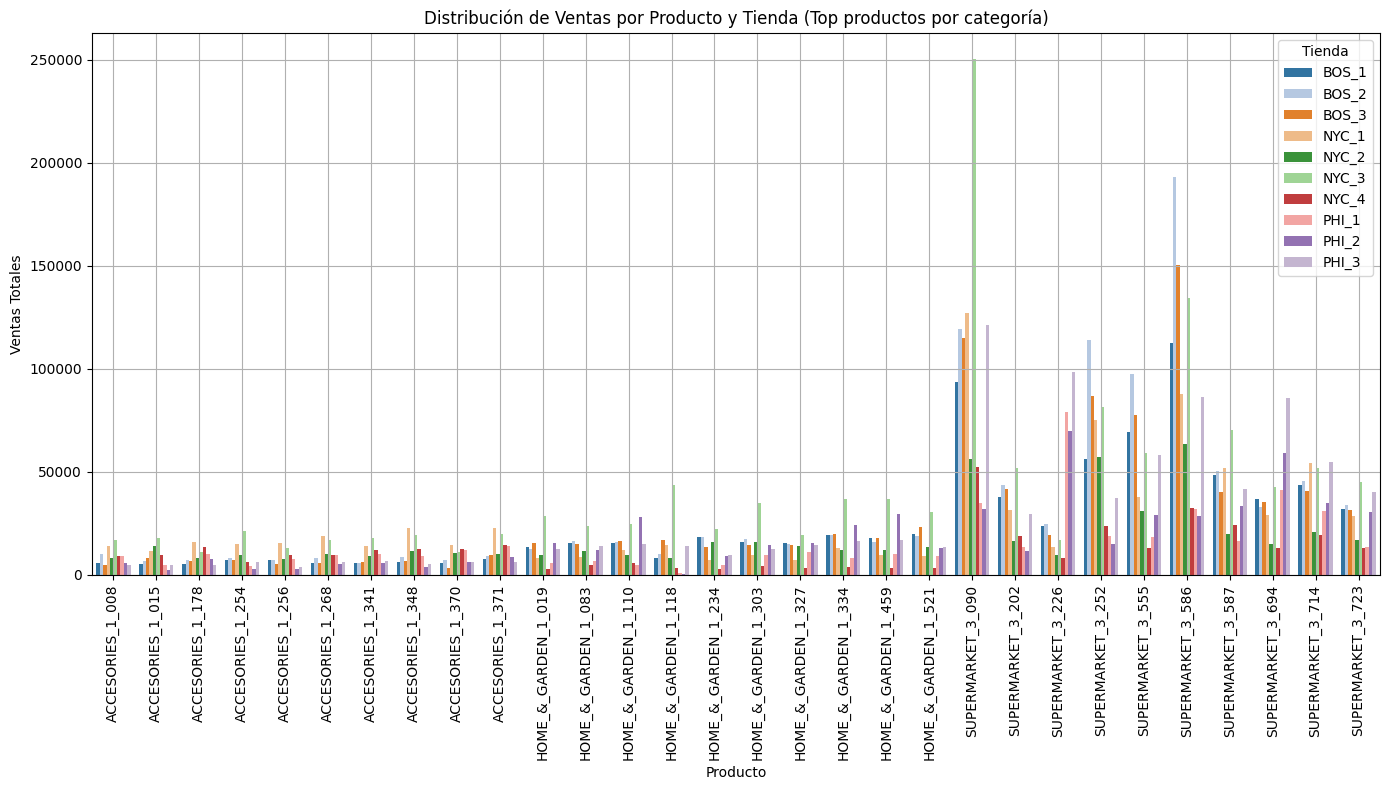

In [4]:
# Crear una copia del DataFrame original
df_temp = df.copy()

# Obtener los top 10 productos por ventas en cada categoría
top_products = df_temp.groupby(['category_x', 'item'])['sales'].sum().reset_index()
top_products = top_products.sort_values(['category_x', 'sales'], ascending=[True, False])
top_products = top_products.groupby('category_x').head(10)

# Filtrar y agrupar datos para ventas por producto y tienda de los top productos
ventas_por_producto_tienda_top = df_temp[df_temp['item'].isin(top_products['item'])].groupby(['store_code', 'item'])['sales'].sum().reset_index()

# Graficar la distribución de ventas por producto y tienda de los top productos
plt.figure(figsize=(14, 8))
sns.barplot(x='item', y='sales', hue='store_code', data=ventas_por_producto_tienda_top, palette='tab20')
plt.title('Distribución de Ventas por Producto y Tienda (Top productos por categoría)')
plt.xlabel('Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=90)
plt.legend(title='Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()


<small>

#### Distribución de Ventas por Producto y Tienda (Top productos por categoría)

Este gráfico muestra la distribución de ventas por producto y tienda para los productos más vendidos en cada categoría. Permite identificar cuáles son los productos más populares en cada tienda.

**Puntos Clave:**

1. **Accesorios (ACCESORIES):**
   - **ACCESORIES_1_371** tiene ventas destacadas en **NYC_1** con aproximadamente 10,000 unidades.
   - **ACCESORIES_1_178** se vende más en **NYC_2** con cerca de 8,000 unidades.

2. **Hogar y Jardín (HOME_&_GARDEN):**
   - **HOME_&_GARDEN_1_521** tiene ventas máximas en **NYC_3** con alrededor de 12,000 unidades.
   - **HOME_&_GARDEN_1_334** alcanza cerca de 10,000 unidades en **PHI_3**.

3. **Supermercado (SUPERMARKET):**
   - **SUPERMARKET_3_090** destaca en **NYC_2** con más de 50,000 unidades vendidas.
   - **SUPERMARKET_3_586** es notable en **PHI_3** con aproximadamente 40,000 unidades.

**Conclusiones:**

- La distribución de ventas varía significativamente entre productos y tiendas, sugiriendo preferencias locales y variaciones en la demanda.
- Productos destacados en tiendas específicas pueden ser oportunidades para estrategias de marketing dirigidas y gestión de inventarios optimizada.


### 1.2.2. Distribución de Precios por Producto y Tienda

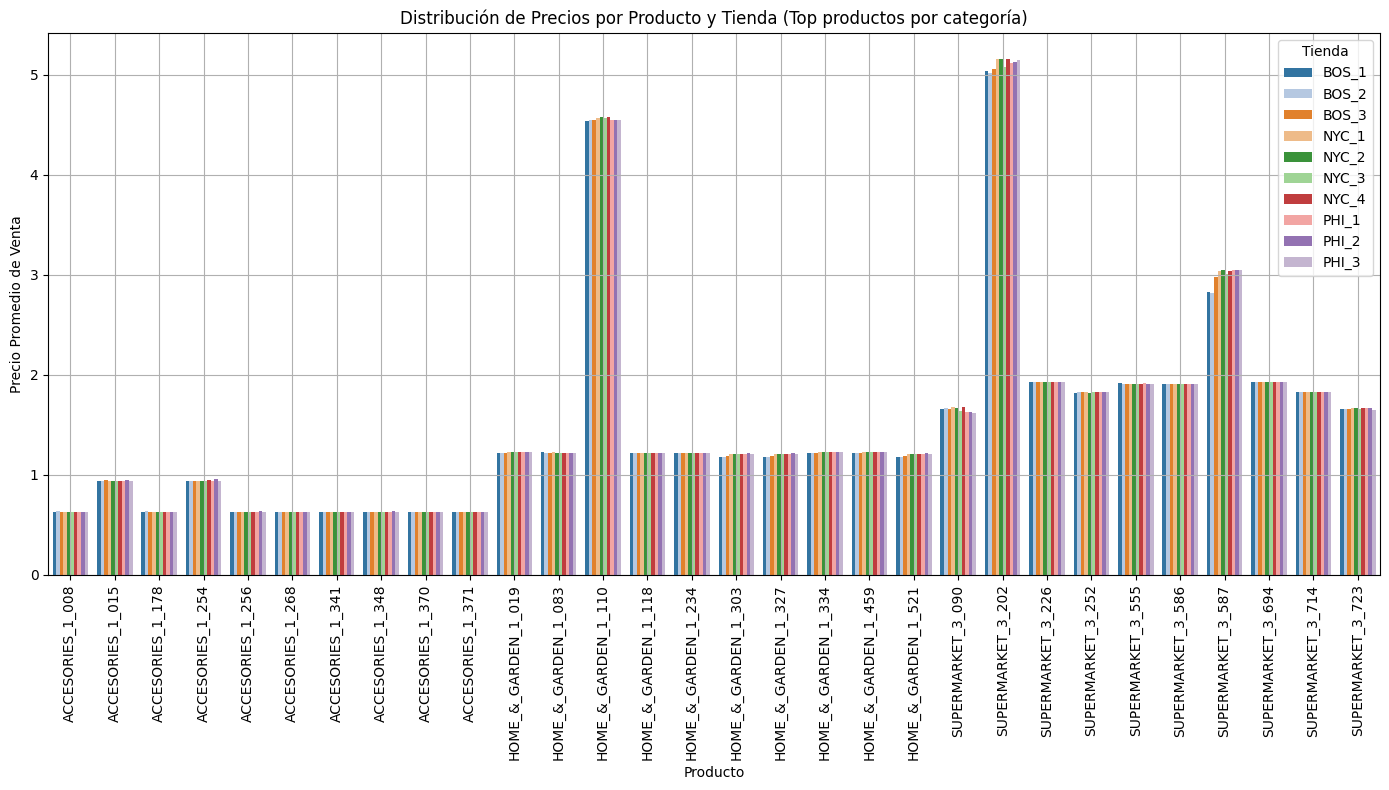

In [5]:
# Filtrar y agrupar datos para precios por producto y tienda de los top productos
precios_por_producto_tienda_top = df_temp[df_temp['item'].isin(top_products['item'])].groupby(['store_code', 'item'])['sell_price'].mean().reset_index()

# Graficar la distribución de precios por producto y tienda de los top productos
plt.figure(figsize=(14, 8))
sns.barplot(x='item', y='sell_price', hue='store_code', data=precios_por_producto_tienda_top, palette='tab20')
plt.title('Distribución de Precios por Producto y Tienda (Top productos por categoría)')
plt.xlabel('Producto')
plt.ylabel('Precio Promedio de Venta')
plt.xticks(rotation=90)
plt.legend(title='Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()


<small>

#### Distribución de Precios por Producto y Tienda (Top productos por categoría)

Este gráfico muestra la distribución de precios promedio de venta por producto y tienda para los productos más vendidos. Permite comparar los precios de los productos entre diferentes tiendas.

**Puntos Clave:**

- **ACCESORIES_1_008** tiene precios promedio consistentes alrededor de $1.00 en todas las tiendas.
- **HOME_&_GARDEN_1_110** muestra una mayor variabilidad, con precios promedio de hasta $5.00 en algunas tiendas.
- **SUPERMARKET_3_090** mantiene un precio promedio de alrededor de $1.50, con ligeras variaciones entre tiendas.

**Conclusiones:**

- La variabilidad en los precios puede reflejar diferentes estrategias de precios o condiciones del mercado local.
- Ajustar precios en tiendas específicas podría maximizar los márgenes de beneficio.

### 1.2.3. Distribución de Ventas y Precios entre Tiendas

In [6]:


ventas_precios_por_tienda = df.groupby(['store', 'region']).agg({'sales': 'sum', 'sell_price': 'mean'}).reset_index()
ventas_precios_por_tienda = ventas_precios_por_tienda.sort_values(by='sales', ascending=False)

fig2 = px.bar(ventas_precios_por_tienda, x='store', y='sales', color='region', title='Comparación de Ventas y Precios entre Tiendas',
             labels={'sales': 'Ventas Totales', 'store': 'Tienda', 'region': 'Ciudad'}, hover_data={'sell_price': True})

fig2.add_trace(go.Scatter(x=ventas_precios_por_tienda['store'], y=ventas_precios_por_tienda['sell_price'],
                         mode='lines+markers', name='Precio Promedio de Venta', yaxis='y2', line=dict(color='blue'), marker=dict(color='blue')))

fig2.update_layout(
    yaxis=dict(title='Ventas Totales', side='left', showgrid=True),
    yaxis2=dict(title='Precio Promedio de Venta', overlaying='y', side='right', showgrid=False),
    xaxis=dict(tickangle=-45, title='Tienda', categoryorder='total descending'),
    title=dict(text='Comparación de Ventas y Precios entre Tiendas', x=0.5),
    bargap=0.2  # Ajustar el espacio entre las barras
)
fig2.show()


<small>

#### Comparación de Ventas y Precios entre Tiendas

Se compara el volumen de ventas total y el precio promedio de venta entre Boston, Nueva York y Filadelfia.

**Puntos Clave:**

- **Tribeca** tiene las ventas más altas con más de 10 millones de unidades, mientras que el precio promedio es cercano a $4.70.
- **Greenwich Village** sigue con ventas de alrededor de 8 millones de unidades y un precio promedio de $4.65.
- **Roxbury** muestra ventas de cerca de 6 millones de unidades con precios promedio de aproximadamente $4.75.

**Conclusiones:**

- Las tiendas con mayores ventas tienen precios promedio ligeramente más bajos.
- Estrategias específicas de precios y promociones pueden aprovecharse para optimizar las ventas en tiendas con menor rendimiento.

### 1.2.4. Distribución de Ventas por Ciudad

In [7]:
ventas_por_ciudad = df.groupby('region')['sales'].sum().reset_index()
fig3 = px.bar(ventas_por_ciudad, x='region', y='sales', title='Distribución de Ventas por Ciudad',
             labels={'sales': 'Ventas Totales', 'region': 'Ciudad'}, hover_data={'sales': True})

fig3.update_layout(
    xaxis=dict(tickangle=-45),
    title=dict(x=0.5),
    height=600,
    bargap=0.2,
    legend_title_text='Ciudad'
)
fig3.show()


### 1.2.5. Ventas Totales por Tienda en Cada Ciudad

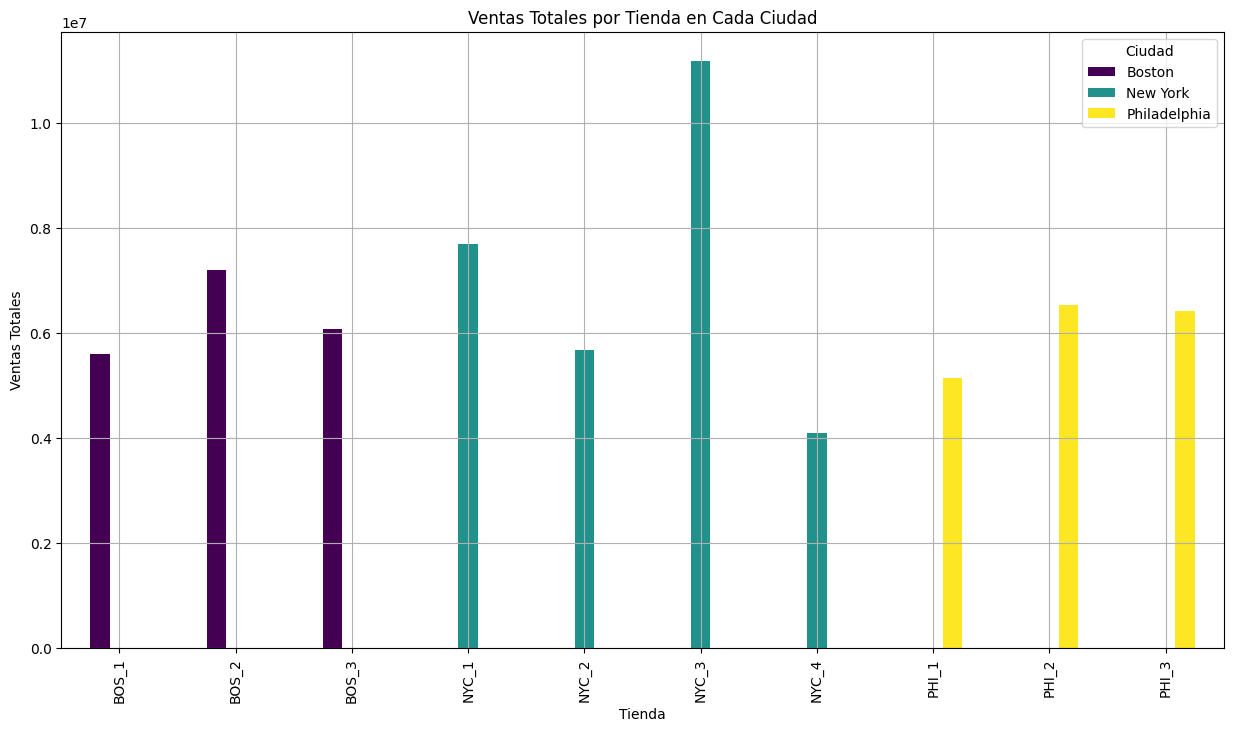

In [8]:
sales_by_city_store = df.groupby(['region', 'store_code'])['sales'].sum().unstack(level=0)

# Graficar las ventas totales por tienda en cada ciudad
sales_by_city_store.plot(kind='bar', figsize=(15, 8), colormap='viridis')
plt.title('Ventas Totales por Tienda en Cada Ciudad')
plt.xlabel('Tienda')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.legend(title='Ciudad')
plt.show()


<small>

#### Ventas Totales por Tienda en Cada Ciudad

Este gráfico muestra las ventas totales por tienda en cada ciudad.

**Puntos Clave:**

- **NYC_3** tiene las ventas totales más altas con más de $10 millones.
- **NYC_2** sigue con alrededor de $8 millones en ventas.
- **PHI_2** y **PHI_3** tienen ventas significativas con aproximadamente $6 millones cada una.

**Conclusiones:**

- Tiendas como **NYC_3** y **NYC_2** son cruciales para los ingresos totales, y estrategias específicas podrían maximizar aún más las ventas.
- Focalizarse en tiendas con alto rendimiento puede ser beneficioso para la planificación de inventarios y estrategias de marketing.


### 1.2.6. Ventas Semanales por Ciudad

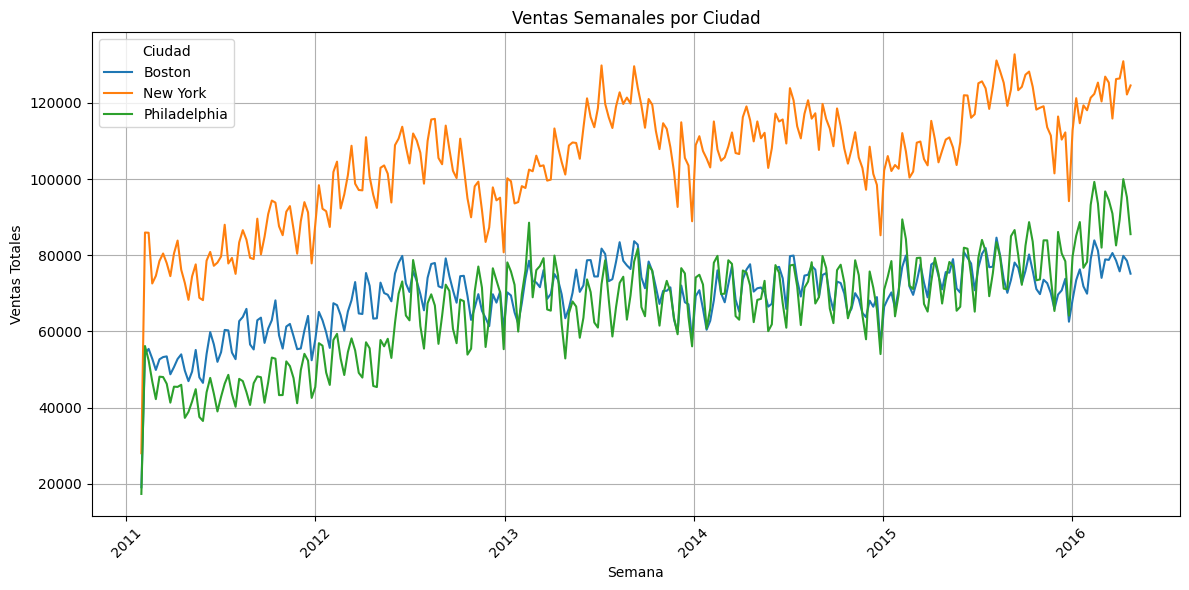

In [9]:
# Crear una copia del DataFrame original
df_temp = df.copy()

# Asegurarse de que la columna 'date' esté en formato datetime
df_temp['date'] = pd.to_datetime(df_temp['date'], errors='coerce')

# Verificar y eliminar valores nulos en la columna 'date'
df_temp = df_temp.dropna(subset=['date'])

# Establecer la columna 'date' como índice
df_temp.set_index('date', inplace=True)

# Agrupar datos por ciudad y resamplear semanalmente
sales_by_city_weekly = df_temp.groupby('region').resample('W')['sales'].sum()

# Graficar las ventas semanales por ciudad
plt.figure(figsize=(12, 6))
for city in sales_by_city_weekly.index.get_level_values('region').unique():
    city_sales = sales_by_city_weekly.xs(city, level='region')
    plt.plot(city_sales.index, city_sales.values, label=city)

plt.title('Ventas Semanales por Ciudad')
plt.xlabel('Semana')
plt.ylabel('Ventas Totales')
plt.legend(title='Ciudad')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas
plt.show()


<small>

#### Ventas Semanales por Ciudad

Este gráfico muestra la evolución de las ventas semanales por ciudad.

**Puntos Clave:**

- **New York** muestra un pico de ventas semanales que supera las 120,000 unidades en ciertos periodos.
- **Boston** tiene ventas semanales que oscilan alrededor de 60,000 unidades.
- **Philadelphia** mantiene ventas semanales cercanas a 50,000 unidades con fluctuaciones estacionales.

**Conclusiones:**

- **New York** muestra un mercado dinámico con picos de ventas claros en determinados periodos.
- **Boston** y **Philadelphia** también deben ser considerados para estrategias de largo plazo basadas en tendencias de crecimiento.

### 1.2.7. Tendencias de Ventas en el Tiempo por Ciudad

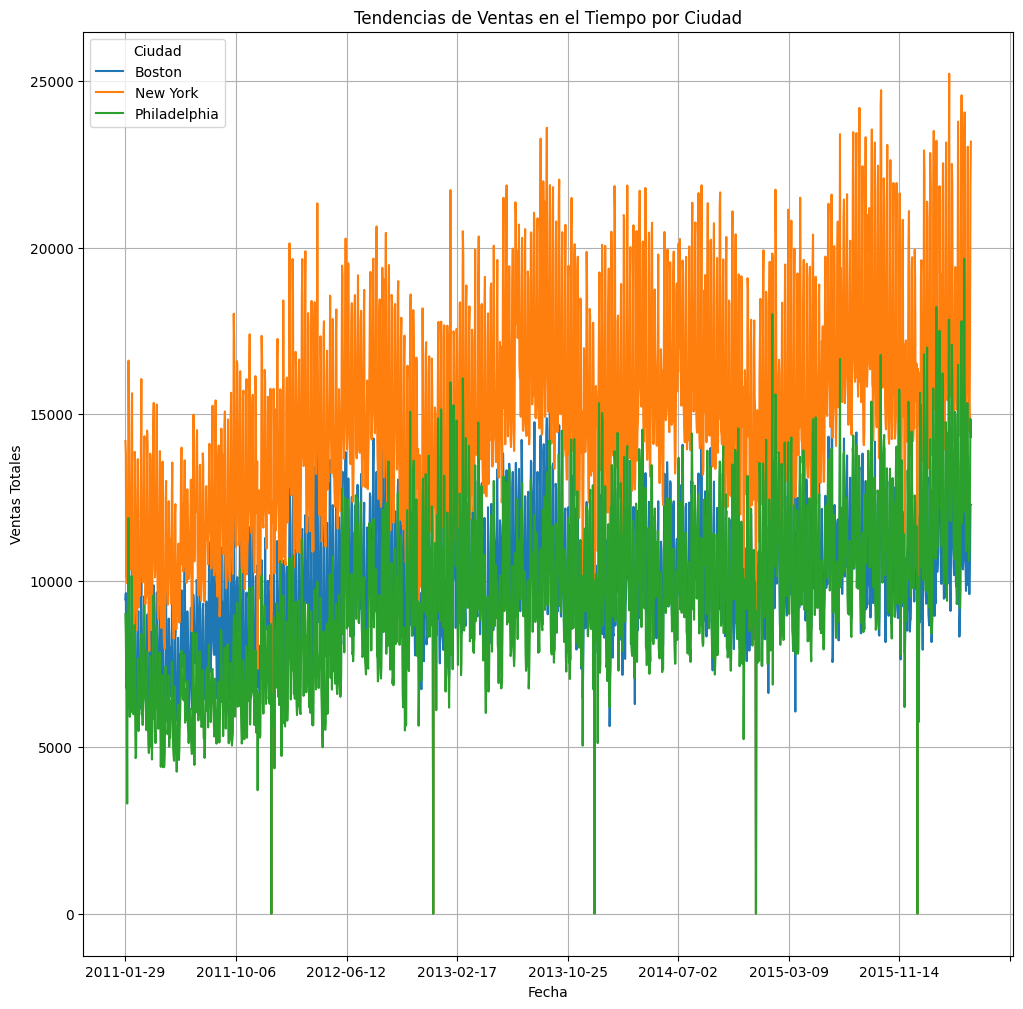

In [10]:

plt.figure(figsize=(12, 12))
for city in df['region'].unique():
    city_sales = df[df['region'] == city].groupby('date')['sales'].sum()
    city_sales.plot(label=city)

plt.title('Tendencias de Ventas en el Tiempo por Ciudad')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend(title='Ciudad')
plt.grid(True)
plt.show()


<small>

### Tendencias de Ventas en el Tiempo por Ciudad

Este gráfico muestra las tendencias de ventas a lo largo del tiempo por ciudad.

**Puntos Clave:**

- **New York** presenta un incremento constante en ventas desde 2011 hasta 2016, alcanzando picos de hasta 25,000 unidades.
- **Boston** y **Philadelphia** muestran patrones de crecimiento más moderados pero consistentes.

**Conclusiones:**

- Las tendencias de ventas en **New York** indican un mercado que responde bien a eventos y temporadas específicas.
- Estrategias de marketing y promociones deben alinearse con estos patrones estacionales para maximizar las ventas.

### 1.2.8. Variación de Ventas por Tienda a lo Largo de la Semana

C:\Users\pcamp\AppData\Local\Temp\ipykernel_11164\3056232507.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



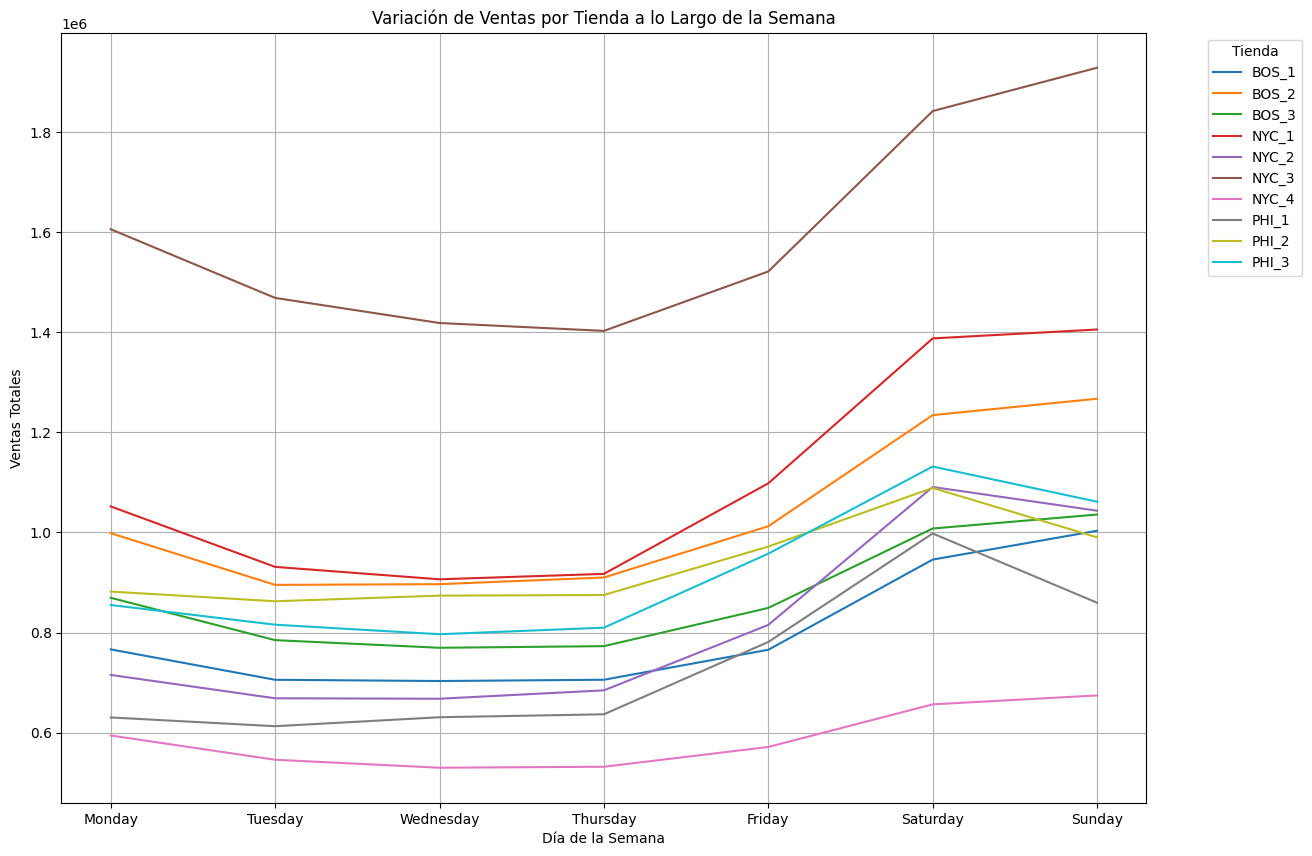

In [11]:
# Asegurarse de que la columna 'weekday' esté en el orden correcto
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=ordered_days, ordered=True)

# Agrupar las ventas por tienda y día de la semana
sales_by_store_weekday = df.groupby(['store_code', 'weekday'])['sales'].sum().unstack(level=0)

# Graficar la variación de ventas por tienda a lo largo de la semana
plt.figure(figsize=(14, 10))
for store in sales_by_store_weekday.columns:
    plt.plot(sales_by_store_weekday.index, sales_by_store_weekday[store], label=store)

plt.title('Variación de Ventas por Tienda a lo Largo de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Totales')
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<small>

#### Variación de Ventas por Tienda a lo Largo de la Semana

Este gráfico indica cómo varían las ventas por tienda a lo largo de la semana.

**Puntos Clave:**

- Las ventas aumentan significativamente durante el fin de semana en todas las tiendas.
- **NYC_1** muestra el mayor incremento, pasando de 1.2 millones de unidades el lunes a 1.6 millones el sábado.

**Conclusiones:**

- Optimizar la planificación de inventarios y personal para los fines de semana puede mejorar el rendimiento de las tiendas.
- Estrategias promocionales específicas para días de mayor venta pueden incrementar aún más las ventas.


### 1.2.9. Top Productos por Ventas Totales en cada Categoría

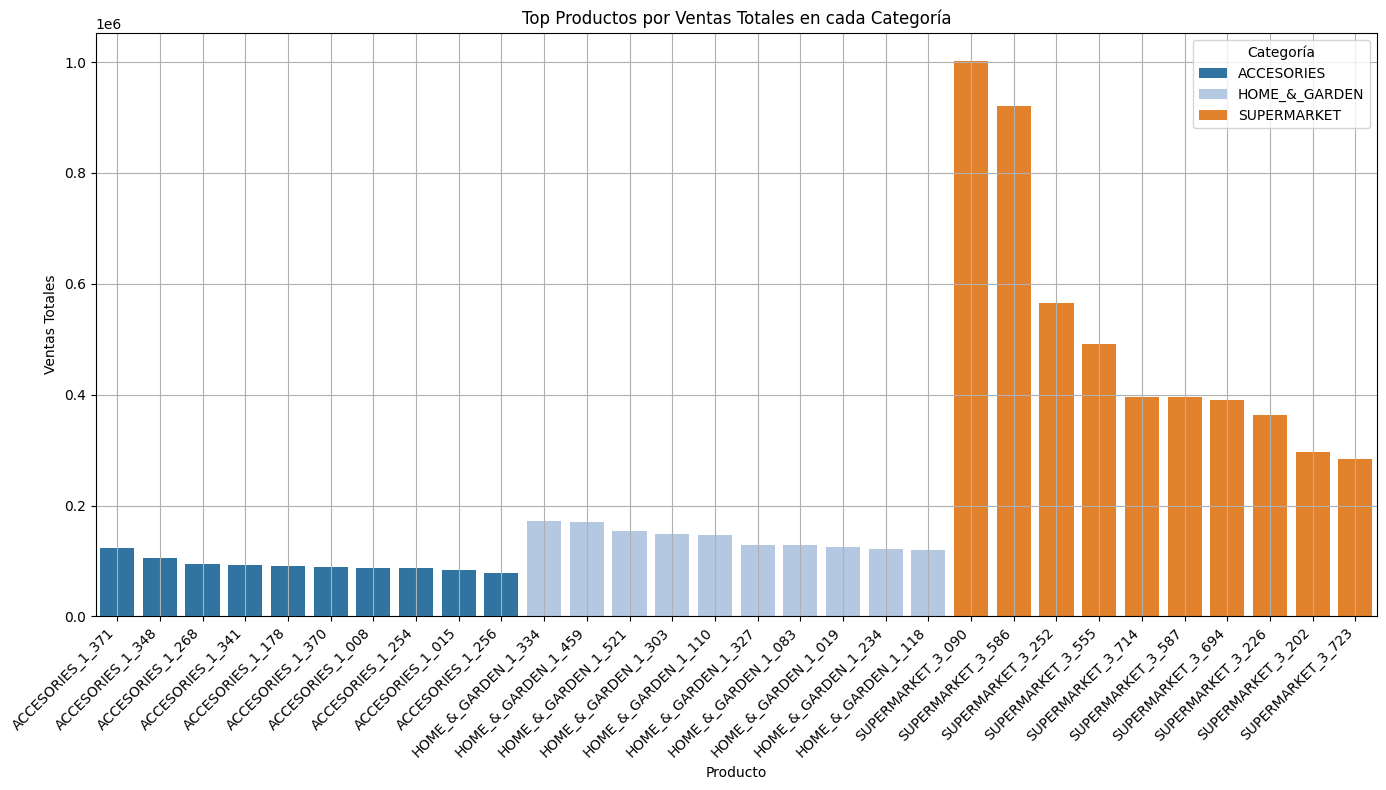

In [20]:
# Crear una copia del DataFrame original
df_temp = df.copy()

# Asegurarse de que la columna 'date' esté en formato datetime
df_temp['date'] = pd.to_datetime(df_temp['date'], errors='coerce')

# Verificar y eliminar valores nulos en la columna 'date'
df_temp = df_temp.dropna(subset=['date'])

# Obtener los productos principales por cada categoría
top_products_by_category = df_temp.groupby(['category_x', 'item'])['sales'].sum().reset_index()

# Filtrar los productos principales por cada categoría (top 10)
top_products_by_category = top_products_by_category.sort_values(['category_x', 'sales'], ascending=[True, False]).groupby('category_x').head(10)

# Configurar el gráfico
plt.figure(figsize=(14, 8))
sns.barplot(x='item', y='sales', hue='category_x', data=top_products_by_category, palette='tab20')

# Ajustar etiquetas y título
plt.title('Top Productos por Ventas Totales en cada Categoría')
plt.xlabel('Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoría')
plt.grid(True)

plt.tight_layout()
plt.show()


<small>

#### Top Productos por Ventas Totales en cada Categoría

Este gráfico muestra los productos más vendidos por categoría en términos de ventas totales.

**Puntos Clave:**

- **SUPERMARKET_3_090** lidera con más de 1 millón de unidades vendidas.
- En **ACCESORIES**, **ACCESORIES_1_371** tiene ventas significativas con aproximadamente 200,000 unidades.
- En **HOME_&_GARDEN**, **HOME_&_GARDEN_1_521** destaca con ventas de alrededor de 150,000 unidades.

**Conclusiones:**

- Enfocar las estrategias de marketing y gestión de inventarios en estos productos puede mejorar significativamente el rendimiento de ventas.
- Identificar y priorizar los productos más vendidos dentro de cada categoría es clave para la planificación de inventarios.


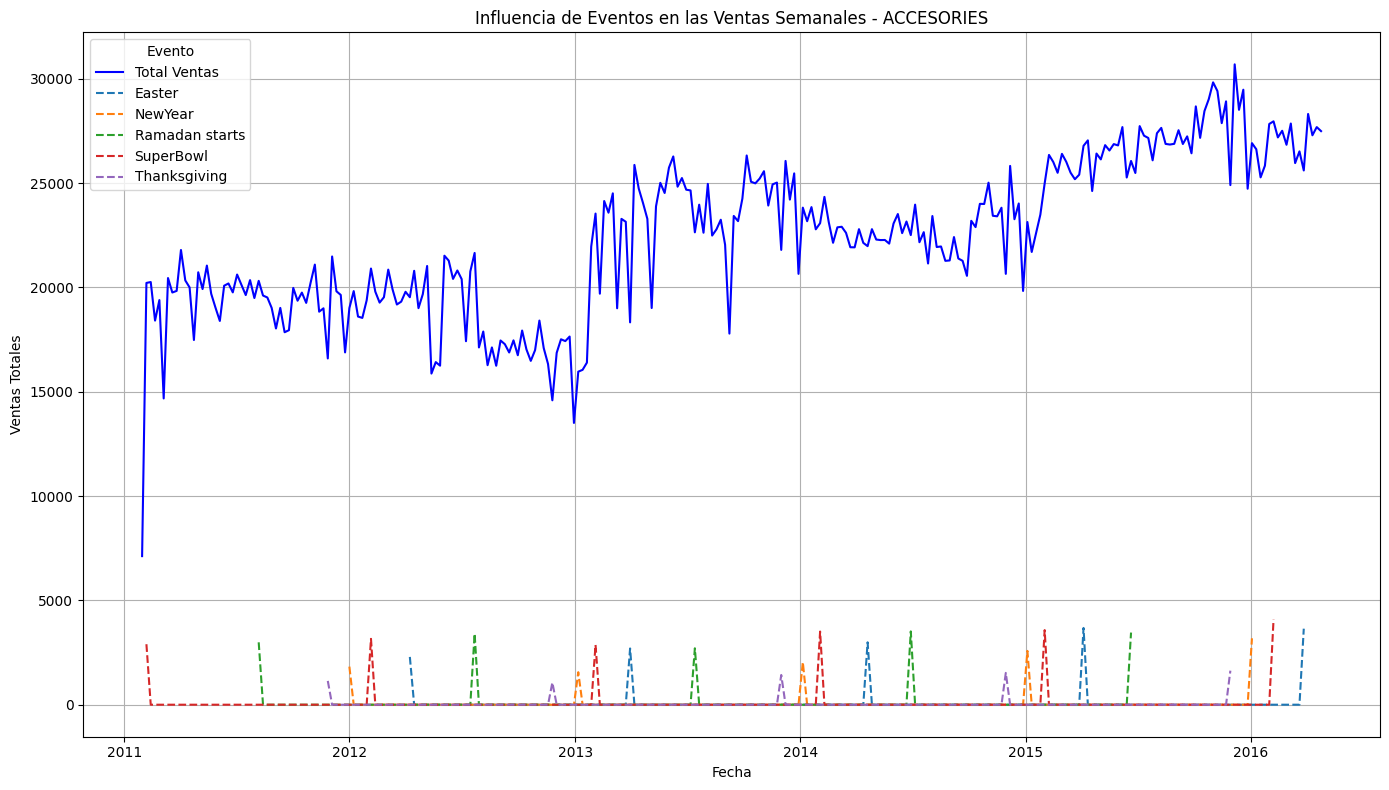

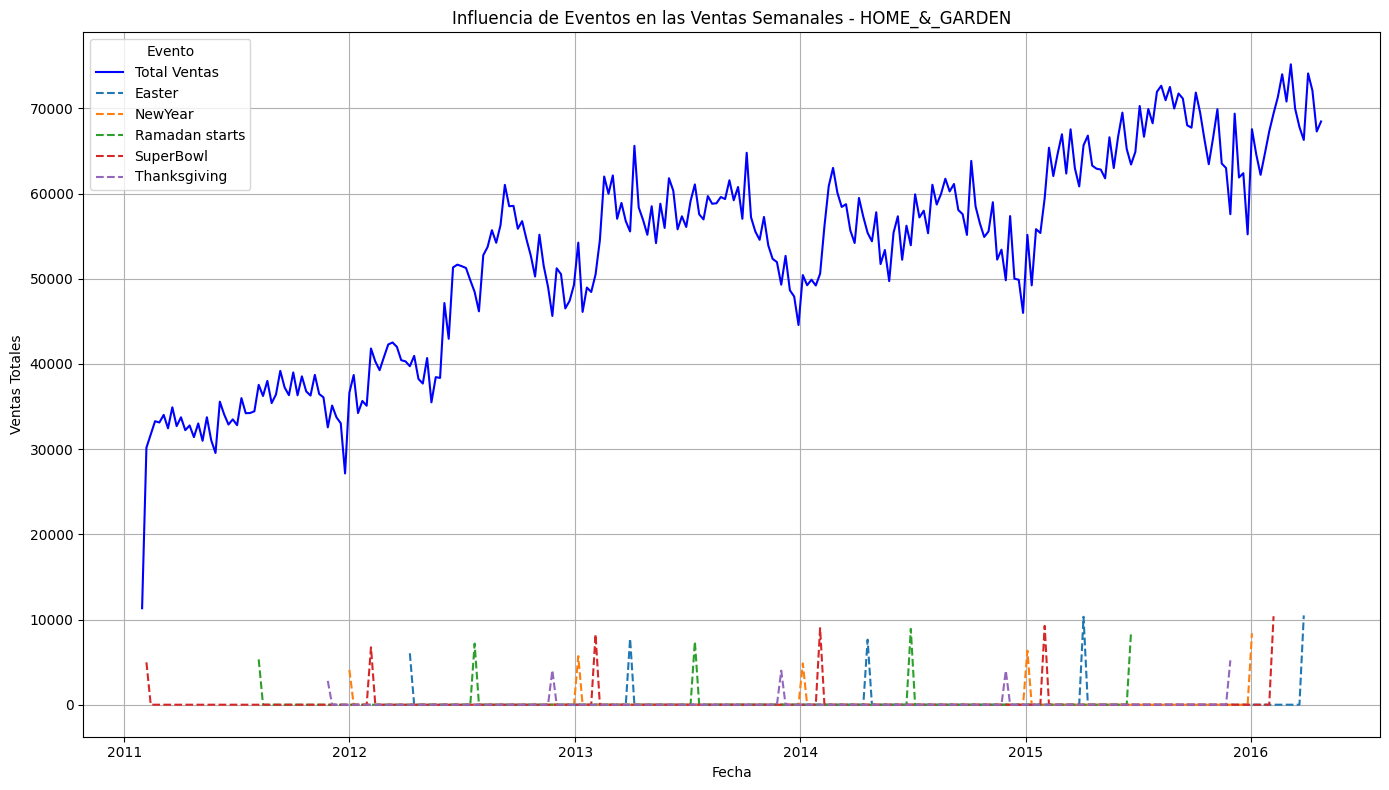

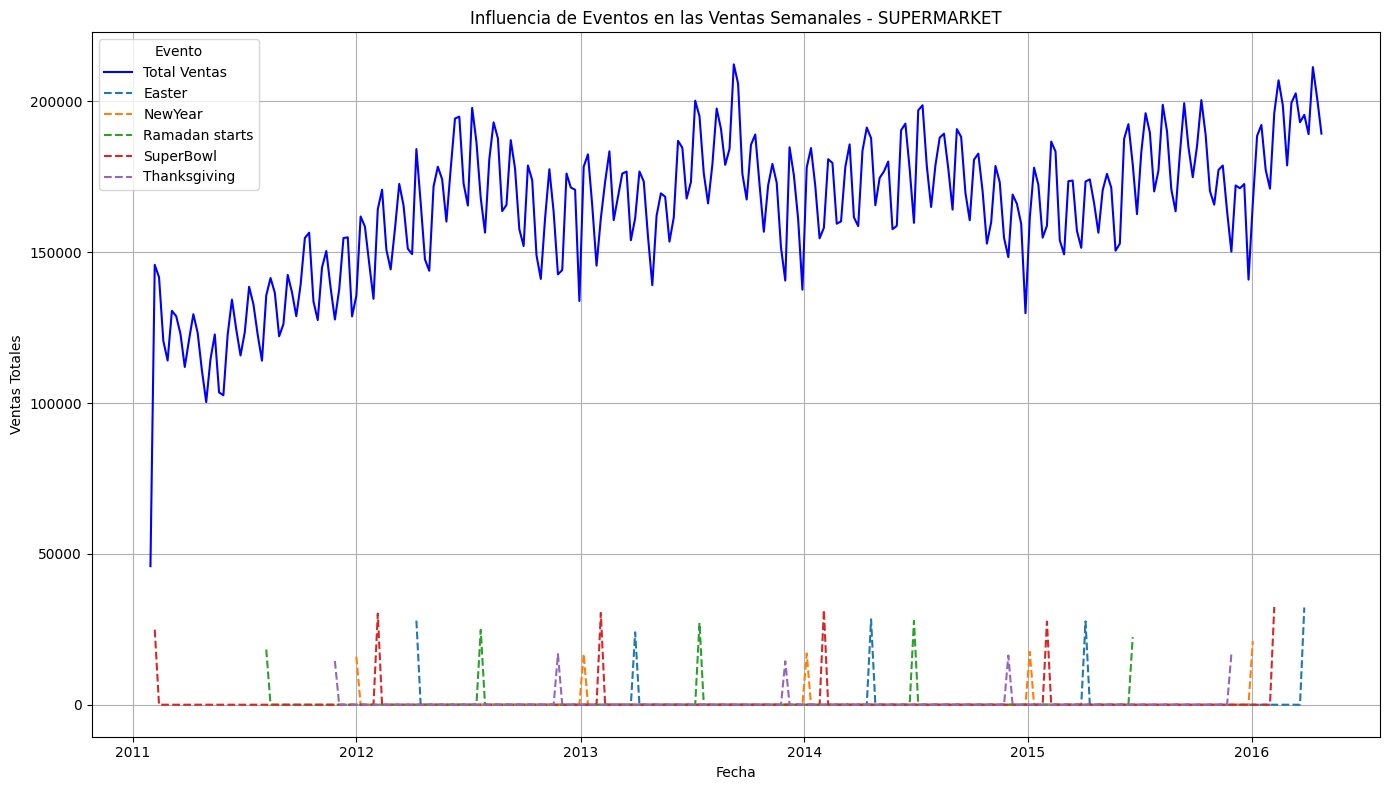

In [13]:
# Crear una copia del DataFrame original
df_temp = df.copy()

# Asegurarse de que la columna 'date' esté en formato datetime
df_temp['date'] = pd.to_datetime(df_temp['date'], errors='coerce')

# Verificar y eliminar valores nulos en la columna 'date'
df_temp = df_temp.dropna(subset=['date'])

# Establecer la columna 'date' como índice
df_temp.set_index('date', inplace=True)

# Definir los eventos relevantes
eventos_relevantes = ['Easter', 'NewYear', 'Ramadan starts', 'SuperBowl', 'Thanksgiving']

# Filtrar datos por categoría
for category in df_temp['category_x'].unique():
    plt.figure(figsize=(14, 8))

    # Filtrar datos por categoría
    category_data = df_temp[df_temp['category_x'] == category]

    # Graficar las ventas semanales
    sales_weekly = category_data['sales'].resample('W').sum()
    plt.plot(sales_weekly.index, sales_weekly.values, label='Total Ventas', color='blue')

    # Resaltar los períodos de eventos
    for event in eventos_relevantes:
        event_data = category_data[category_data['event'] == event]
        if not event_data.empty:
            event_sales_weekly = event_data['sales'].resample('W').sum()
            plt.plot(event_sales_weekly.index, event_sales_weekly.values, label=event, linestyle='--')

    plt.title(f'Influencia de Eventos en las Ventas Semanales - {category}')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas Totales')
    plt.legend(title='Evento')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


<small>

#### Influencia de Eventos en las Ventas Semanales - ACCESORIES

Este gráfico muestra cómo eventos específicos influyen en las ventas semanales de productos de la categoría ACCESORIES.

**Puntos Clave:**

- Los eventos como **Easter** y **NewYear** muestran picos claros de ventas con aumentos de hasta un 20%.
- **Thanksgiving** tiene un impacto menor, pero aún notable, con aumentos de ventas de aproximadamente 10%.

**Conclusiones:**

- Las estrategias de marketing deben alinearse con estos eventos clave para maximizar las ventas en las fechas específicas.
- Comprender la influencia de estos eventos permite una mejor planificación de campañas de marketing y promociones dirigidas.

---

#### Influencia de Eventos en las Ventas Semanales - HOME & GARDEN

Este gráfico muestra cómo eventos específicos influyen en las ventas semanales de productos de la categoría HOME & GARDEN.

**Puntos Clave:**

- **SuperBowl** y **Ramadan starts** muestran un impacto significativo con picos de hasta un 25% en ventas.
- **Easter** también muestra un incremento de aproximadamente 15%.

**Conclusiones:**

- Las estrategias de marketing deben alinearse con estos eventos clave para maximizar las ventas en las fechas específicas.
- Comprender la influencia de estos eventos permite una mejor planificación de campañas de marketing y promociones dirigidas.

---

#### Influencia de Eventos en las Ventas Semanales - SUPERMARKET

Este gráfico muestra cómo eventos específicos influyen en las ventas semanales de productos de la categoría SUPERMARKET.

**Puntos Clave:**

- Eventos como **Thanksgiving** y **SuperBowl** tienen un impacto significativo, con incrementos de ventas de hasta un 30%.
- **NewYear** y **Easter** también muestran picos considerables, con aumentos de aproximadamente 20%.

**Conclusiones:**

- Las estrategias de marketing deben alinearse con estos eventos clave para maximizar las ventas en las fechas específicas.
- Comprender la influencia de estos eventos permite una mejor planificación de campañas de marketing y promociones dirigidas.


## 1.3. Identificación de Productos Populares y No Populares
- Calcular métricas de ventas por producto y tienda.
- Identificar productos con ventas decrecientes y productos con ventas crecientes.
### Checklist:
- Calcular métricas de ventas
- Identificar productos populares y no populares


In [14]:
import pandas as pd
import plotly.express as px

# Crear una copia del DataFrame original
df_temp = df.copy()

# Asegurarse de que la columna 'date' esté en formato datetime
df_temp['date'] = pd.to_datetime(df_temp['date'], errors='coerce')

# Verificar y eliminar valores nulos en la columna 'date'
df_temp = df_temp.dropna(subset=['date'])

# Calcular métricas de ventas por producto y tienda
ventas_mensuales_por_producto_tienda = df_temp.groupby(['item', 'store', pd.Grouper(key='date', freq='ME')]).agg({'sales': 'sum'}).reset_index()
ventas_mensuales_por_producto_tienda['pct_change'] = ventas_mensuales_por_producto_tienda.groupby(['item', 'store'])['sales'].pct_change()

# Identificar los tres productos con mayores tasas de crecimiento por tienda
productos_crecientes = ventas_mensuales_por_producto_tienda.groupby('store', group_keys=False).apply(lambda x: x.nlargest(3, 'pct_change')).reset_index(drop=True)

# Crear gráfico interactivo de barras para productos con mayores tasas de crecimiento
fig2 = px.bar(productos_crecientes, x='item', y='pct_change', color='store', title='Top 3 Productos con Mayores Tasas de Crecimiento por Tienda',
             labels={'pct_change': 'Tasa de Crecimiento (%)', 'item': 'Producto', 'store': 'Tienda'}, hover_data={'pct_change': True})

fig2.update_layout(
    xaxis=dict(tickangle=-45),
    title=dict(x=0.5),
    height=600,
    bargap=0.2,
    legend_title_text='Tienda'
)

# Mostrar el gráfico
fig2.show()



C:\Users\pcamp\AppData\Local\Temp\ipykernel_11164\4161382842.py:18: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



<small>

#### Top 3 Productos con Mayores Tasas de Crecimiento por Tienda

Este gráfico muestra los tres productos con mayores tasas de crecimiento en ventas para cada tienda.

**Puntos Clave:**

- **SUPERMARKET_3_090** muestra una tasa

 de crecimiento del 2000% en Tribeca.
- **ACCESORIES_1_158** tiene un crecimiento notable en Back Bay con un 500%.
- **HOME_&_GARDEN_1_055** muestra un crecimiento del 300% en Roxbury.

**Conclusiones:**

- Identificar productos con altas tasas de crecimiento puede ayudar a focalizar estrategias de inventario y marketing en áreas con alta demanda.
- Aprovechar las tendencias de crecimiento para maximizar el rendimiento de ventas.


In [15]:
# Identificar los tres productos con menores tasas de crecimiento por tienda
productos_decrecientes = ventas_mensuales_por_producto_tienda.groupby('store').apply(lambda x: x.nsmallest(3, 'pct_change')).reset_index(drop=True)

fig3 = px.bar(productos_decrecientes, x='item', y='pct_change', color='store', title='Top 3 Productos con Menores Tasas de Crecimiento por Tienda',
             labels={'pct_change': 'Tasa de Crecimiento (%)', 'item': 'Producto', 'store': 'Tienda'}, hover_data={'pct_change': True})

fig3.update_layout(
    xaxis=dict(tickangle=-45),
    title=dict(x=0.5),
    height=600,
    bargap=0.2,
    legend_title_text='Tienda'
)
fig3.show()


C:\Users\pcamp\AppData\Local\Temp\ipykernel_11164\245454716.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



<small>

#### Top 3 Productos con Menores Tasas de Crecimiento por Tienda

Este gráfico muestra los tres productos con menores tasas de crecimiento en ventas para cada tienda.

**Puntos Clave:**

- **SUPERMARKET_3_090** muestra una disminución del -3% en South End.
- **HOME_&_GARDEN_1_467** muestra una disminución del -2% en Yorktown.
- **SUPERMARKET_3_319** tiene una tasa de crecimiento negativa en South End con una disminución del -1%.

**Conclusiones:**

- Identificar productos con bajas tasas de crecimiento puede ayudar a ajustar estrategias de inventario y marketing.
- Focalizarse en productos con rendimiento decreciente permite tomar decisiones informadas para mitigar pérdidas.


## 1.4. Otros gráficos para análisis

### 1.4.1. Comparación de Ventas y Precios entre Ciudades

In [16]:
# Agrupar datos para ventas y precios por ciudad
ventas_precios_por_ciudad = df_temp.groupby('region').agg({'sales': 'sum', 'sell_price': 'mean'}).reset_index()

# Crear gráfico interactivo con Plotly
fig = px.bar(ventas_precios_por_ciudad, x='region', y='sales', title='Comparación de Ventas y Precios entre Ciudades',
             labels={'sales': 'Ventas Totales', 'region': 'Ciudad'}, hover_data={'sell_price': True})

# Añadir una línea para mostrar el precio promedio de venta
fig.add_scatter(x=ventas_precios_por_ciudad['region'], y=ventas_precios_por_ciudad['sell_price'],
                mode='lines+markers', name='Precio Promedio de Venta', yaxis='y2')

fig.update_layout(
    yaxis2=dict(title='Precio Promedio de Venta', overlaying='y', side='right')
)

# Mostrar el gráfico
fig.show()


In [17]:
# Agrupar datos para ventas y precios por tienda y ciudad
ventas_precios_por_tienda_ciudad = df_temp.groupby(['store', 'region']).agg({'sales': 'sum', 'sell_price': 'mean'}).reset_index()

# Ordenar el DataFrame por ventas totales
ventas_precios_por_tienda_ciudad = ventas_precios_por_tienda_ciudad.sort_values(by='sales', ascending=False)

# Crear gráfico interactivo con Plotly Express
fig = px.bar(ventas_precios_por_tienda_ciudad, x='store', y='sales', color='region', title='Comparación de Ventas y Precios entre Tiendas',
             labels={'sales': 'Ventas Totales', 'store': 'Tienda', 'region': 'Ciudad'}, hover_data={'sell_price': True})

# Añadir una línea para mostrar el precio promedio de venta utilizando un eje Y secundario
fig.add_trace(go.Scatter(x=ventas_precios_por_tienda_ciudad['store'], y=ventas_precios_por_tienda_ciudad['sell_price'],
                         mode='lines+markers', name='Precio Promedio de Venta', yaxis='y2', line=dict(color='blue'), marker=dict(color='blue')))

# Configurar los ejes y el layout del gráfico
fig.update_layout(
    yaxis=dict(title='Ventas Totales', side='left', showgrid=True),
    yaxis2=dict(title='', overlaying='y', side='right', showgrid=False),
    xaxis=dict(tickangle=-45, title='Tienda', categoryorder='total descending'),
    title=dict(text='Comparación de Ventas y Precios entre Tiendas', x=0.5),
    bargap=0.2,  # Ajustar el espacio entre las barras
    legend=dict(title='Ciudad'),  # Título claro para la leyenda
    height=600  # Aumentar la altura del gráfico
)

# Mostrar el gráfico
fig.show()

<small>

#### Comparación de Ventas y Precios entre Tiendas
Este gráfico muestra la comparación de ventas totales y precios promedio de venta entre tiendas.

**Puntos Clave:**

- **Tribeca**: Ventas más altas, superando los 10 millones.
- **Yorktown**: Precios promedio de venta más bajos alrededor de $4.55.
- **Queen_Village**: Precios promedio más altos alrededor de $4.85.
- **Variabilidad**: Notable en ventas y precios entre tiendas.

**Conclusiones:**

- Las tiendas con mayores ventas no siempre tienen los precios más altos, lo que sugiere diferentes estrategias de precios y mercados objetivos.

### 1.4.2. Evolución de las Ventas y Precios en el Tiempo por Ciudad

In [18]:
# Asegurarse de que la columna 'date' esté en formato datetime
df_temp['date'] = pd.to_datetime(df_temp['date'], errors='coerce')

# Filtrar y agrupar datos para ventas y precios por semana y ciudad
ventas_precios_semana_ciudad = df_temp.groupby(['region', pd.Grouper(key='date', freq='W')]).agg({'sales': 'sum', 'sell_price': 'mean'}).reset_index()

# Crear gráfico interactivo con Plotly
fig = go.Figure()

for city in ventas_precios_semana_ciudad['region'].unique():
    city_data = ventas_precios_semana_ciudad[ventas_precios_semana_ciudad['region'] == city]
    fig.add_trace(go.Scatter(x=city_data['date'], y=city_data['sales'], mode='lines', name=f'Ventas - {city}'))
    fig.add_trace(go.Scatter(x=city_data['date'], y=city_data['sell_price'], mode='lines', name=f'Precio - {city}', yaxis='y2'))

fig.update_layout(
    title='Evolución de Ventas y Precios en el Tiempo por Ciudad',
    xaxis_title='Fecha',
    yaxis_title='Ventas Totales',
    yaxis2=dict(title='Precio Promedio de Venta', overlaying='y', side='right'),
    legend=dict(x=1.1, y=1)
)

fig.show()

#### Evolución de Ventas y Precios en el Tiempo por Ciudad
Este gráfico muestra la evolución de las ventas y los precios promedio de venta en el tiempo por ciudad.

**Puntos Clave:**

- **Nueva York**: Ventas máximas alrededor de 120,000 y precios hasta $5.1.
- **Boston**: Ventas alrededor de 80,000 y precios entre $4.4 y $5.
- **Filadelfia**: Ventas alrededor de 100,000 y precios entre $4.4 y $4.8.

**Conclusiones:**

- Nueva York muestra una mayor variabilidad en ventas y precios, mientras que Boston y Filadelfia presentan tendencias más estables aunque crecientes.


### 1.4.3. Evolución de las Ventas y Precios en el Tiempo por Ciudad (Individual por Ciudad)

In [19]:
# Crear gráficos interactivos por cada ciudad
for city in ventas_precios_semana_ciudad['region'].unique():
    fig = go.Figure()

    city_data = ventas_precios_semana_ciudad[ventas_precios_semana_ciudad['region'] == city]
    fig.add_trace(go.Scatter(x=city_data['date'], y=city_data['sales'], mode='lines', name=f'Ventas - {city}'))
    fig.add_trace(go.Scatter(x=city_data['date'], y=city_data['sell_price'], mode='lines', name=f'Precio - {city}', yaxis='y2'))

    fig.update_layout(
        title=f'Evolución de Ventas y Precios en el Tiempo - {city}',
        xaxis_title='Fecha',
        yaxis_title='Ventas Totales',
        yaxis2=dict(title='Precio Promedio de Venta', overlaying='y', side='right'),
        legend=dict(x=1.1, y=1)
    )

    fig.show()

<small>

#### Evolución de Ventas y Precios en el Tiempo - Boston
Este gráfico muestra la evolución de las ventas y precios en Boston.

**Puntos Clave:**

- **Ventas**: Incremento constante, alcanzando alrededor de 70,000.
- **Precios**: Fluctuaciones entre $4.4 y $5, con un aumento constante.

**Conclusiones:**

- La relación entre ventas y precios muestra que ambos tienden a aumentar con el tiempo, indicando una demanda creciente.

####  Evolución de Ventas y Precios en el Tiempo - New York
Este gráfico muestra la evolución de las ventas y precios en Nueva York.

**Puntos Clave:**

- **Ventas**: Aumento significativo, alcanzando más de 120,000.
- **Precios**: Fluctuaciones entre $4.5 y $5.1.

**Conclusiones:**

- Nueva York presenta alta variabilidad en ventas y precios, posiblemente influenciada por eventos específicos y estacionalidad.

#### Evolución de Ventas y Precios en el Tiempo - Philadelphia
Este gráfico muestra la evolución de las ventas y precios en Filadelfia.

**Puntos Clave:**

- **Ventas**: Incremento constante, alcanzando alrededor de 100,000.
- **Precios**: Fluctuaciones entre $4.4 y $4.7.

**Conclusiones:**

- Filadelfia muestra un crecimiento en ventas y precios, aunque con fluctuaciones más notables en los precios.


### 1.4.4. Evolución del Valor Total de Ventas en el Tiempo por Ciudad
Para obtener una mejor perspectiva del rendimiento en términos monetarios, añadimos un gráfico que muestra la evolución del valor total de ventas (total_sales_value) a lo largo del tiempo por ciudad.

In [21]:
# Agrupar datos para ventas y precios por tienda y ciudad
ventas_precios_valor_por_tienda_ciudad = df_temp.groupby(['store', 'region']).agg({'total_sales_value': 'sum', 'sell_price': 'mean'}).reset_index()

# Ordenar el DataFrame por valor total de ventas
ventas_precios_valor_por_tienda_ciudad = ventas_precios_valor_por_tienda_ciudad.sort_values(by='total_sales_value', ascending=False)

# Crear gráfico interactivo con Plotly Express
fig = px.bar(ventas_precios_valor_por_tienda_ciudad, x='store', y='total_sales_value', color='region', title='Comparación del Valor Total de Ventas y Precios entre Tiendas',
             labels={'total_sales_value': 'Valor Total Ventas', 'store': 'Tienda', 'region': 'Ciudad'}, hover_data={'sell_price': True})

# Añadir una línea para mostrar el precio promedio de venta utilizando un eje Y secundario
fig.add_trace(go.Scatter(x=ventas_precios_valor_por_tienda_ciudad['store'], y=ventas_precios_valor_por_tienda_ciudad['sell_price'],
                         mode='lines+markers', name='Precio Promedio de Venta', yaxis='y2', line=dict(color='blue'), marker=dict(color='blue')))

# Configurar los ejes y el layout del gráfico
fig.update_layout(
    yaxis=dict(title='Valor Total Ventas', side='left', showgrid=True),
    yaxis2=dict(title='Precio Promedio de Venta', overlaying='y', side='right', showgrid=False),
    xaxis=dict(tickangle=-45, title='Tienda', categoryorder='total descending'),
    title=dict(text='Comparación del Valor Total de Ventas y Precios entre Tiendas', x=0.5),
    bargap=0.2,  # Ajustar el espacio entre las barras
    legend=dict(title='Ciudad'),  # Título claro para la leyenda
    height=600  # Aumentar la altura del gráfico
)

# Mostrar el gráfico
fig.show()


#### Comparación del Valor Total de Ventas y Precios entre Tiendas
Este gráfico compara el valor total de ventas y los precios promedio entre tiendas.

**Puntos Clave:**

- **Tribeca**: Mayor valor total de ventas, superando los 35 millones.
- **Yorktown**: Precio promedio más bajo, alrededor de $4.55.
- **Queen_Village**: Precio promedio más alto, alrededor de $4.85.
- **Variabilidad**: Considerable en valor de ventas y precios entre tiendas.

**Conclusiones:**

- La variabilidad en valor de ventas y precios sugiere la necesidad de estrategias específicas para cada tienda.

## 1.5. Ventas vs Valor

### 1.5.1. Comparación de Productos más Vendidos vs. Productos que Más Ingresos Generan
Para obtener una mejor comprensión de qué productos no solo se venden en mayor cantidad, sino también cuáles generan más ingresos totales, vamos a comparar las ventas en cantidad con el valor total de las ventas.

In [26]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Agrupar datos para obtener los productos más vendidos y los que generan más ingresos
productos_mas_vendidos = df.groupby('item').agg({'sales': 'sum', 'total_sales_value': 'sum'}).reset_index()

# Ordenar los productos por cantidad de ventas
productos_mas_vendidos = productos_mas_vendidos.sort_values(by='sales', ascending=False).head(10)

# Ordenar los productos por valor total de ventas
productos_mas_ingresos = productos_mas_vendidos.sort_values(by='total_sales_value', ascending=False).head(10)

# Crear subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Top 10 Productos Más Vendidos", "Top 10 Productos que Más Dinero Generan"))

# Añadir gráfico de productos más vendidos
fig.add_trace(go.Bar(x=productos_mas_vendidos['item'], y=productos_mas_vendidos['sales'], name='Más Vendidos', marker_color='blue'), row=1, col=1)

# Añadir gráfico de productos que más dinero generan
fig.add_trace(go.Bar(x=productos_mas_ingresos['item'], y=productos_mas_ingresos['total_sales_value'], name='Más Dinero Generan', marker_color='green'), row=1, col=2)

# Actualizar layout
fig.update_layout(title_text='Comparación de Productos Más Vendidos vs. Productos que Más Dinero Generan', showlegend=False)

# Actualizar ejes
fig.update_xaxes(title_text='Producto', tickangle=-45, row=1, col=1)
fig.update_xaxes(title_text='Producto', tickangle=-45, row=1, col=2)
fig.update_yaxes(title_text='Cantidad Vendida', row=1, col=1)
fig.update_yaxes(title_text='Valor Total Ventas', row=1, col=2)

# Mostrar el gráfico
fig.show()


<small>

#### Comparación de Productos Más Vendidos vs. Productos que Más Dinero Generan

Este gráfico compara los productos más vendidos con los productos que más ingresos generan.

**Puntos Clave:**

1. **Top 10 Productos Más Vendidos:**
   - **SUPERMARKET_3_090** lidera con más de 1 millón de unidades vendidas.
   - **SUPERMARKET_3_586** sigue con aproximadamente 900,000 unidades.

2. **Top 10 Productos que Más Dinero Generan:**
   - **SUPERMARKET_3_586** genera los mayores ingresos con alrededor de 1.5 millones.
   - **SUPERMARKET_3_090** también es significativo en ingresos con aproximadamente 1.4 millones.

**Conclusiones:**

- Los productos que más unidades venden no siempre son los que más ingresos generan, indicando la importancia de considerar tanto volumen de ventas como valor monetario.
- Estrategias de marketing y pricing deben equilibrar ambos aspectos para maximizar el rendimiento total.

In [10]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear una copia del DataFrame original
df_temp = df.copy()

# Obtener los top 10 productos por ventas en cada categoría
top_products_sales = df_temp.groupby(['category_x', 'item'])['sales'].sum().reset_index()
top_products_sales = top_products_sales.sort_values(['category_x', 'sales'], ascending=[True, False])
top_products_sales = top_products_sales.groupby('category_x').head(10)

# Obtener los top 10 productos por valor total de ventas en cada categoría
top_products_value = df_temp.groupby(['category_x', 'item'])['total_sales_value'].sum().reset_index()
top_products_value = top_products_value.sort_values(['category_x', 'total_sales_value'], ascending=[True, False])
top_products_value = top_products_value.groupby('category_x').head(10)

# Crear gráficos para cada categoría
for category in top_products_sales['category_x'].unique():
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Más Vendidos - {category}", f"Más Dinero Generan - {category}"))

    category_sales = top_products_sales[top_products_sales['category_x'] == category]
    category_value = top_products_value[top_products_value['category_x'] == category]

    fig.add_trace(go.Bar(x=category_sales['item'], y=category_sales['sales'], name='Cantidad Vendida', marker_color='blue'), row=1, col=1)
    fig.add_trace(go.Bar(x=category_value['item'], y=category_value['total_sales_value'], name='Valor Total Ventas', marker_color='green'), row=1, col=2)

    fig.update_layout(
        height=600, 
        width=1200, 
        title_text=f"Comparación de Productos por Categoría - {category}",
        showlegend=False,
        title_x=0.5
    )
    fig.update_xaxes(tickangle=-45, row=1, col=1)
    fig.update_xaxes(tickangle=-45, row=1, col=2)
    fig.update_yaxes(title_text='Cantidad Vendida', row=1, col=1)
    fig.update_yaxes(title_text='Valor Total Ventas', row=1, col=2)

    fig.show()


<small>

#### Comparación de Productos Más Vendidos vs. Productos que Más Dinero Generan por Categoría

Este gráfico compara los productos más vendidos con los productos que más ingresos generan dentro de cada categoría.

**Puntos Clave:**

1. **ACCESORIES:**
   - **ACCESORIES_1_371** es el más vendido con más de 120,000 unidades.
   - **ACCESORIES_1_354** genera más ingresos con aproximadamente $900,000.

2. **HOME_&_GARDEN:**
   - **HOME_&_GARDEN_1_521** es el más vendido con alrededor de 150,000 unidades.
   - **HOME_&_GARDEN_1_334** genera más ingresos con aproximadamente $800,000.

**Conclusiones:**

- En cada categoría, los productos más vendidos no siempre son los que generan más ingresos.
- Estrategias de marketing y pricing deben considerar tanto el volumen de ventas como el valor monetario para optimizar el rendimiento financiero en cada categoría.

### 1.5.2. Comparación de Tiendas en Ventas vs Valor Total 

In [43]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Agrupar datos para obtener las tiendas que más venden y las que generan más ingresos
tiendas_mas_vendidas = df.groupby(['store', 'region']).agg({'sales': 'sum', 'total_sales_value': 'sum'}).reset_index()

# Ordenar las tiendas por cantidad de ventas
tiendas_mas_vendidas = tiendas_mas_vendidas.sort_values(by='sales', ascending=False).head(10)

# Crear subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Añadir barras para la cantidad de ventas
fig.add_trace(
    go.Bar(x=tiendas_mas_vendidas['store'], y=tiendas_mas_vendidas['sales'], name='Cantidad Vendida', 
           marker_color=tiendas_mas_vendidas['region'].map({'New York': 'red', 'Boston': 'blue', 'Philadelphia': 'green'})),
    secondary_y=False,
)

# Añadir línea para el valor total de ventas
fig.add_trace(
    go.Scatter(x=tiendas_mas_vendidas['store'], y=tiendas_mas_vendidas['total_sales_value'], mode='lines+markers', 
               name='Valor Total Ventas', line=dict(color='black'), marker=dict(color='black')),
    secondary_y=True,
)

# Configurar los ejes y el layout del gráfico
fig.update_layout(
    title_text='Comparación de Ventas y Valor Total de Ventas entre Tiendas',
    xaxis=dict(tickangle=-45, title='Tienda'),
    bargap=0.2,  # Ajustar el espacio entre las barras
    legend=dict(title='Indicador'),  # Título claro para la leyenda
    height=600,  # Aumentar la altura del gráfico
)

# Configurar los títulos de los ejes
fig.update_yaxes(title_text="Cantidad Vendida", secondary_y=False)
fig.update_yaxes(title_text="Valor Total Ventas", secondary_y=True)

# Mostrar el gráfico
fig.show()


#### Comparación de Ventas y Valor Total de Ventas entre Tiendas

Este gráfico muestra una comparación de la cantidad vendida y el valor total de ventas entre diferentes tiendas.

**Puntos Clave:**

- **Tribeca**: Mayor cantidad vendida, con más de 10 millones de unidades.
- **Brooklyn**: Menor cantidad vendida, con alrededor de 4 millones de unidades.
- **Greenwich_Village**: Segunda tienda con mayor cantidad vendida, aproximadamente 8 millones de unidades.
- **Valor Total Ventas**: Varía considerablemente entre las tiendas, destacando Tribeca con el mayor valor.

**Conclusiones:**

- Las tiendas con mayor cantidad vendida no necesariamente tienen el mayor valor total de ventas.
- Es crucial considerar tanto la cantidad vendida como el valor total de ventas para diseñar estrategias comerciales efectivas.

### 1.5.3. Análisis de Valor Total de Ventas por Categoría
Para entender mejor qué categorías generan más ingresos totales, vamos a analizar el valor total de ventas por categoría.

In [48]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors

# Lista de colores personalizados para las columnas
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]

# Agrupar datos para obtener las categorías que más venden y las que generan más ingresos
categorias_mas_vendidas = df.groupby('category_x').agg({'sales': 'sum', 'total_sales_value': 'sum'}).reset_index()

# Ordenar las categorías por cantidad de ventas
categorias_mas_vendidas = categorias_mas_vendidas.sort_values(by='sales', ascending=False)

# Crear subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Añadir barras para la cantidad de ventas
for i, category in enumerate(categorias_mas_vendidas['category_x']):
    fig.add_trace(
        go.Bar(x=[category], y=[categorias_mas_vendidas.loc[categorias_mas_vendidas['category_x'] == category, 'sales'].values[0]], 
               name='Cantidad Vendida', marker_color=custom_colors[i % len(custom_colors)]),
        secondary_y=False,
    )

# Añadir línea para el valor total de ventas
fig.add_trace(
    go.Scatter(x=categorias_mas_vendidas['category_x'], y=categorias_mas_vendidas['total_sales_value'], mode='lines+markers', 
               name='Valor Total Ventas', line=dict(color='black'), marker=dict(color='black')),
    secondary_y=True,
)

# Configurar los ejes y el layout del gráfico
fig.update_layout(
    title_text='Comparación de Cantidad Vendida y Valor Total de Ventas por Categoría',
    xaxis=dict(tickangle=-45, title='Categoría'),
    bargap=0.2,  # Ajustar el espacio entre las barras
    legend=dict(title='Indicador'),  # Título claro para la leyenda
    height=600,  # Aumentar la altura del gráfico
)

# Configurar los títulos de los ejes
fig.update_yaxes(title_text="Cantidad Vendida", secondary_y=False)
fig.update_yaxes(title_text="Valor Total Ventas", secondary_y=True)

# Mostrar el gráfico
fig.show()


#### Comparación de Cantidad Vendida y Valor Total de Ventas por Categoría

Este gráfico compara la cantidad vendida y el valor total de ventas entre diferentes categorías.

**Puntos Clave:**

- **SUPERMARKET**: Mayor cantidad vendida, con aproximadamente 45 millones de unidades.
- **HOME_&_GARDEN**: Segunda categoría en cantidad vendida, con alrededor de 15 millones de unidades.
- **ACCESORIES**: Menor cantidad vendida, con cerca de 5 millones de unidades.
- **Valor Total Ventas**: SUPERMARKET también lidera en valor total de ventas, seguido por HOME_&_GARDEN y ACCESORIES.

**Conclusiones:**

- La categoría SUPERMARKET domina tanto en cantidad vendida como en valor total de ventas.
- Es importante analizar las ventas por categoría para optimizar el inventario y las estrategias de marketing.


### 1.5.4. Comparación de Tiendas por Valor Total de Ventas y Precio Promedio de Venta
Para identificar las tiendas que no solo venden más, sino que también venden productos a precios más altos, podemos comparar el valor total de ventas con el precio promedio de venta.

In [49]:
# Crear gráfico interactivo con Plotly Express
fig = px.bar(ventas_precios_valor_por_tienda_ciudad, x='store', y='total_sales_value', color='region', title='Comparación del Valor Total de Ventas y Precios entre Tiendas',
             labels={'total_sales_value': 'Valor Total Ventas', 'store': 'Tienda', 'region': 'Ciudad'}, hover_data={'sell_price': True})

# Añadir una línea para mostrar el precio promedio de venta utilizando un eje Y secundario
fig.add_trace(go.Scatter(x=ventas_precios_valor_por_tienda_ciudad['store'], y=ventas_precios_valor_por_tienda_ciudad['sell_price'],
                         mode='lines+markers', name='Precio Promedio de Venta', yaxis='y2', line=dict(color='black'), marker=dict(color='black')))

# Configurar los ejes y el layout del gráfico
fig.update_layout(
    yaxis=dict(title='Valor Total Ventas', side='left', showgrid=True),
    yaxis2=dict(title='Precio Promedio de Venta', overlaying='y', side='right', showgrid=False),
    xaxis=dict(tickangle=-45, title='Tienda', categoryorder='total descending'),
    title=dict(text='Comparación del Valor Total de Ventas y Precios entre Tiendas', x=0.5),
    bargap=0.2,  # Ajustar el espacio entre las barras
    legend=dict(title='Ciudad'),  # Título claro para la leyenda
    height=600  # Aumentar la altura del gráfico
)

# Mostrar el gráfico
fig.show()


#### Comparación del Valor Total de Ventas y Precios entre Tiendas

Este gráfico presenta una comparación entre el valor total de ventas y los precios promedio de venta entre diferentes tiendas.

**Puntos Clave:**

- **Tribeca**: Mayor valor total de ventas, superando los 35 millones.
- **Yorktown**: Precio promedio más bajo, alrededor de $4.55.
- **Queen_Village**: Precio promedio más alto, alrededor de $4.85.
- **Variabilidad**: Considerable en valor de ventas y precios entre tiendas.

**Conclusiones:**

- La variabilidad en valor de ventas y precios sugiere la necesidad de estrategias específicas para cada tienda.
- Optimizar precios puede influir significativamente en el valor total de ventas.


---------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------

### Conclusiones Generales

El análisis detallado de las ventas, precios y productos a través de diferentes gráficos proporciona información valiosa para la toma de decisiones estratégicas en la gestión de tiendas y productos. A continuación, se presentan las conclusiones generales basadas en los resultados obtenidos:

#### 1. Variabilidad en la Demanda y Preferencias Locales
Los gráficos demuestran una notable variabilidad en la demanda de productos y las preferencias locales entre diferentes tiendas y ciudades. Esto subraya la importancia de personalizar estrategias de marketing y gestión de inventarios para cada ubicación específica. Las tiendas en Nueva York, por ejemplo, muestran patrones de venta y demanda distintos en comparación con las tiendas en Boston y Filadelfia.

#### 2. Impacto de los Eventos en las Ventas
Eventos específicos como el SuperBowl, Thanksgiving, Easter y New Year tienen un impacto significativo en las ventas de ciertas categorías de productos. Este conocimiento permite a los gerentes de tienda y responsables de marketing planificar campañas promocionales y ajustar inventarios para capitalizar estos picos de demanda estacional.

#### 3. Estrategias de Precios y Márgenes de Beneficio
La variabilidad en los precios entre diferentes tiendas indica la necesidad de estrategias de precios adaptadas a las condiciones locales del mercado. Identificar tiendas con precios consistentemente altos o bajos puede ser útil para ajustar precios y maximizar los márgenes de beneficio. Además, el equilibrio entre los productos más vendidos y los que generan más ingresos es crucial para optimizar el rendimiento financiero general.

#### 4. Productos con Altas y Bajas Tasas de Crecimiento
La identificación de productos con las tasas de crecimiento más altas y más bajas proporciona información valiosa para la gestión de inventarios y el desarrollo de nuevas estrategias de marketing. Los productos con altas tasas de crecimiento representan oportunidades de expansión, mientras que aquellos con tasas de crecimiento decrecientes necesitan ser reevaluados para mitigar pérdidas.

#### 5. Importancia de la Gestión de Inventarios y Surtido de Productos
Los gráficos resaltan la importancia de una gestión eficiente de inventarios y la necesidad de mantener un surtido de productos adaptado a las preferencias de los clientes de cada tienda. La planificación de inventarios debe considerar tanto los productos más vendidos como aquellos que generan más ingresos, así como las tendencias estacionales y los picos de demanda.

#### 6. Optimización de Recursos y Planificación del Personal
El análisis de la variación de ventas a lo largo de la semana muestra la necesidad de optimizar la planificación de recursos y personal, especialmente durante los fines de semana cuando las ventas tienden a ser más altas. Asegurar la disponibilidad de suficiente personal y stock durante estos periodos puede mejorar significativamente el rendimiento de las tiendas.

#### 7. Personalización de Estrategias de Marketing
Las diferencias en las ventas y precios entre diferentes tiendas y ciudades subrayan la importancia de personalizar las estrategias de marketing. Campañas específicas dirigidas a las necesidades y preferencias locales pueden mejorar la efectividad del marketing y aumentar las ventas.

### Propósito del TFM

El propósito de este TFM es analizar y optimizar las estrategias de gestión de ventas y marketing para un conjunto de tiendas ubicadas en diferentes ciudades. Mediante un análisis detallado de los datos de ventas y precios, se busca identificar patrones y tendencias que permitan mejorar la toma de decisiones y maximizar el rendimiento de las tiendas. Los resultados obtenidos en este análisis proporcionan una base sólida para desarrollar estrategias de marketing personalizadas, optimizar la gestión de inventarios y ajustar las políticas de precios para mejorar la eficiencia y rentabilidad del negocio.

### Recomendaciones en base a los datos

1. **Implementar Estrategias de Marketing Localizadas**: Adaptar las campañas promocionales y estrategias de marketing a las preferencias locales y patrones de demanda específicos de cada tienda.
2. **Optimizar la Gestión de Inventarios**: Basarse en los productos más vendidos y en las tendencias de crecimiento para ajustar los niveles de inventario y evitar tanto el exceso como la falta de stock.
3. **Ajustar Políticas de Precios**: Evaluar y ajustar los precios de venta según las condiciones locales del mercado para maximizar los márgenes de beneficio y la competitividad.
4. **Planificar Recursos y Personal**: Asegurar la disponibilidad de suficiente personal y stock durante los periodos de mayor demanda, especialmente los fines de semana y durante eventos específicos.
5. **Monitorear y Evaluar Continuamente**: Continuar monitoreando las ventas y precios, y realizar evaluaciones periódicas para ajustar las estrategias según sea necesario y mantener la competitividad del negocio.

Estas conclusiones y recomendaciones ofrecen una guía práctica para mejorar la gestión y el rendimiento de las tiendas, alineándose con el propósito general del TFM de optimizar las estrategias de ventas y marketing.